**DHRUV JOSHI, AHMED KAMAL**

Fall 2019

CS343: Neural Networks

Project 3: Convolutional Neural Networks

In [73]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=7)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Global note: Make sure any debug printouts do not appear if `verbose=False`!**

## Task 4) Implement weight optimizers for gradient descent

To change the weights during training, we need an optimization algorithm to have our loss decrease over epochs as we learn the structure of the input patterns. Until now, we used **Stochastic gradient descent (SGD)**, which is the simplest algorithm. We will implement 3 popular algorithms:

- `SGD` (stochastic gradient descent)
- `SGD_Momentum` (stochastic gradient descent with momentum)
- `Adam` (Adaptive Moment Estimation)

Implement each of these according to the update equations (in `optimizer.py::update_weights` in each subclass). Let's use $w_t$ in the math below to represent the weights in a layer at time step $t$, $dw$ to represent the gradient of the weights in a layer, and $\eta$ represent the learning rate. We use vectorized notation below (update applies to all weights element-wise). Then:

**SGD**: 

$w_{t} = w_{t-1} - \eta \times dw$

**SGD (momentum)**:

$v_{t} = m \times v_{t-1} - \eta \times dw$

$w_{t} = w_{t-1} + v_t$

where $v_t$ is called the `velocity` at time $t$. At the first time step (0), velocity should be set to all zeros and have the same shape as $w$. $m$ is a constant that determines how much of the gradient obtained on the previous time step should factor into the weight update for the current time step.


**Adam**:

$m_{t} = \beta_1 \times m_{t-1} + (1 - \beta_1)\times dw$

$v_{t} = \beta_2 \times v_{t-1} + (1 - \beta_2)\times dw^2$

$n = m_{t} / \left (1-(\beta_1^t) \right )$

$u = v_{t} / \left (1-(\beta_2^t) \right )$

$w_{t} = w_{t-1} - \left ( \eta \times n \right ) / \left ( \sqrt(u) + \epsilon \right ) $


Like SGD (momentum), Adam records momentum terms $m$ and $v$. At time step 0, you should initialize them to zeros in an array equal in size to the weights. $n$ and $u$ are variables computed on each time step. The remaining quantities are constants. Note that $t$ keeps track of the integer time step, and needs to be incremented on each update. 

In [74]:
from optimizer import *

####  Test SGD

In [19]:
np.random.seed(0)

wts = np.arange(-3, 3, dtype=np.float64)
d_wts = np.random.randn(len(wts))

optimizer = SGD()
optimizer.prepare(wts, d_wts)

new_wts_1 = optimizer.update_weights()
new_wts_2 = optimizer.update_weights()

print(f'SGD: Wts after 1 iter {new_wts_1}')
print(f'SGD: Wts after 2 iter {new_wts_2}')

SGD: Wts after 1 iter [-3.1764052 -2.0400157 -1.0978738 -0.2240893  0.8132442  2.0977278]
SGD: Wts after 2 iter [-3.3528105 -2.0800314 -1.1957476 -0.4481786  0.6264884  2.1954556]


Output should be:

    SGD: Wts after 1 iter [-3.1764052 -2.0400157 -1.0978738 -0.2240893  0.8132442  2.0977278]
    SGD: Wts after 2 iter [-3.3528105 -2.0800314 -1.1957476 -0.4481786  0.6264884  2.1954556]

####  Test SGD_Momentum

In [20]:
np.random.seed(0)

wts = np.random.randn(3, 4)
d_wts = np.random.randn(3, 4)

optimizer = SGD_Momentum(lr=0.1, m=0.6)
optimizer.prepare(wts, d_wts)

new_wts_1 = optimizer.update_weights()
new_wts_2 = optimizer.update_weights()

print(f'SGD M: Wts after 1 iter\n{new_wts_1}')
print(f'SGD M: Wts after 2 iter\n{new_wts_2}')

SGD M: Wts after 1 iter
[[ 1.6879486  0.3879897  0.9343517  2.2075258]
 [ 1.7181501 -0.9567621  0.9187816 -0.0659476]
 [ 0.1520801  0.3452366  0.0576     1.52849  ]]
SGD M: Wts after 2 iter
[[ 1.5661825  0.3685217  0.8633335  2.1541379]
 [ 1.4790974 -0.9239367  0.8686908  0.0707077]
 [ 0.5605585  0.2406577 -0.0807098  1.6472364]]


Output should be:

    SGD M: Wts after 1 iter
    [[ 1.6879486  0.3879897  0.9343517  2.2075258]
     [ 1.7181501 -0.9567621  0.9187816 -0.0659476]
     [ 0.1520801  0.3452366  0.0576     1.52849  ]]
    SGD M: Wts after 2 iter
    [[ 1.5661825  0.3685217  0.8633335  2.1541379]
     [ 1.4790974 -0.9239367  0.8686908  0.0707077]
     [ 0.5605585  0.2406577 -0.0807098  1.6472364]]

####  Test Adam

In [22]:
np.random.seed(0)

wts = np.random.randn(3, 4)
d_wts = np.random.randn(3, 4)

optimizer = Adam(lr=0.1)
optimizer.prepare(wts, d_wts)

new_wts_1 = optimizer.update_weights()
new_wts_2 = optimizer.update_weights()
new_wts_3 = optimizer.update_weights()

print(f'Adam: Wts after 1 iter\n{new_wts_1}')
print(f'Adam: Wts after 2 iter\n{new_wts_2}')
print(f'Adam: Wts after 3 iter\n{new_wts_3}')

Adam: Wts after 1 iter
[[ 1.6640523  0.3001572  0.878738   2.1408932]
 [ 1.767558  -0.8772779  0.8500884 -0.0513572]
 [-0.0032189  0.3105985  0.0440436  1.5542735]]
Adam: Wts after 2 iter
[[ 1.5640523  0.2001572  0.778738   2.0408932]
 [ 1.667558  -0.7772779  0.7500884  0.0486428]
 [ 0.0967811  0.2105985 -0.0559564  1.6542735]]
Adam: Wts after 3 iter
[[ 1.4640523  0.1001572  0.678738   1.9408932]
 [ 1.567558  -0.6772779  0.6500884  0.1486428]
 [ 0.1967811  0.1105985 -0.1559564  1.7542735]]


Output should be:

    Adam: Wts after 1 iter
    [[ 1.6640523  0.3001572  0.878738   2.1408932]
     [ 1.767558  -0.8772779  0.8500884 -0.0513572]
     [-0.0032189  0.3105985  0.0440436  1.5542735]]
    Adam: Wts after 2 iter
    [[ 1.5640523  0.2001572  0.778738   2.0408932]
     [ 1.667558  -0.7772779  0.7500884  0.0486428]
     [ 0.0967811  0.2105985 -0.0559564  1.6542735]]
    Adam: Wts after 3 iter
    [[ 1.4640523  0.1001572  0.678738   1.9408932]
     [ 1.567558  -0.6772779  0.6500884  0.1486428]
     [ 0.1967811  0.1105985 -0.1559564  1.7542735]]  

## Task 5) Write network training methods

Implement methods in `network.py` to actually train the network, using all the building blocks that you have created. The methods to implement are:

- `predict`
- `fit`. Add an optional parameter `print_every=1` that controls the frequency (in iterations) with which to wait before printing out the loss and iteration number.

## Task 6) Overfitting a convolutional neural network

Usually we try to prevent overfitting, but we can use it as a valuable debugging tool to test out a complex backprop-style neural network. Assuming everything is working, it is almost always the case that we should be able to overfit a tiny dataset with a huge model with tons of parameters (i.e. your CNN). You will use this strategy to verify that your network is working.

Let's use a small amount of real data from STL-10. If everything is working properly, the network should overfit and you should see a significant drop in the loss from its starting value of ~2.3.

### 6a) Move your `preprocess_data.py` from the MLP project

Make the one following change:

- Re-arrange dimensions of `imgs` so that when it is returned, `shape=(Num imgs, RGB color chans, height, width)` (No longer flatten non-batch dimensions)

In [75]:
import load_stl10_dataset
import preprocess_data
from network import ConvNet4
import optimizer

### 6b) Load in STL-10 at 16x16 resolution

If you don't want to wait for STL-10 to download from the internet and resize, copy over your data and numpy folders from your MLP project.

**Notes:**
- You will need to download the new version of `load_stl10_dataset`.
- The different train/test split here won't work if you hard coded the proportions in your `create_splits` implementation! *This isn't catastrophic, it just means that it will take longer to compute accuracy on the validation set.*

In [31]:
# Download the STL-10 dataset from the internet, convert it to Numpy ndarray, resize to 16x16
# cache it locally on your computer for faster loading next time.
load_stl10_dataset.purge_cached_dataset()
stl_imgs, stl_labels = load_stl10_dataset.load(scale_fact=6)
# preprocess
stl_imgs, stl_labels = preprocess_data.preprocess_stl(stl_imgs, stl_labels)
# create splits
x_train, y_train, x_test, y_test, x_val, y_val, x_dev, y_dev = preprocess_data.create_splits(
    stl_imgs, stl_labels, n_train_samps=4548, n_test_samps=400, n_valid_samps=2, n_dev_samps=50)

print ('Train data shape: ', x_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Test data shape: ', x_test.shape)
print ('Test labels shape: ', y_test.shape)
print ('Validation data shape: ', x_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('dev data shape: ', x_dev.shape)
print ('dev labels shape: ', y_dev.shape)

classes = np.loadtxt(os.path.join('data', 'stl10_binary', 'class_names.txt'), dtype=str)

Images are: (5000, 96, 96, 3)
Labels are: (5000,)
Resizing 5000 images to 16x16...Done!
Saving Numpy arrays the images and labels to ./numpy...Done!
imgs shape before transpose (5000, 16, 16, 3)
imgs shape after transpose (5000, 3, 16, 16)
Train data shape:  (4548, 3, 16, 16)
Train labels shape:  (4548,)
Test data shape:  (400, 3, 16, 16)
Test labels shape:  (400,)
Validation data shape:  (2, 3, 16, 16)
Validation labels shape:  (2,)
dev data shape:  (50, 3, 16, 16)
dev labels shape:  (50,)


### 6c) Train and overfit the network on a small STL-10 sample with each optimizer

**Goal:** If your network works, you should see a drop in loss over epochs to 0.

In 3 seperate cells below

- Create 3 different `ConvNet4` networks.
- Compile each with a different optimizer (each net uses a different optimizer).
- Train each on the **dev** set and validate on the tiny validation set (we dont care about out-of-training-set performance here).

You will be making plots demonstrating the overfitting for each optimizer below. **You should train the nets with the same number of epochs such that at least 2/3 of them clearly show loss convergence to a small value; one optimizer may not converge yet, and that's ok**. Cut off the simulations based on the 2/3 that do converge.

Guidelines:

- Weight scales and learning rates of `1e-2` should work well.
- Start by testing the Adam optimizer.
- Remember that the input shape is (3, 16, 16). You need to specify this to the network constructor.
- The hyperparameters are up to you, though I wouldn't recommend a batch size that is too small (close to 1), otherwise it may be tricky to see whether the loss is actually decreasing on average.
- Decreasing `acc_freq` will make the `fit` function evaluate the training and validation accuracy more often. This is a computationally intensive process, so small values come with an increase in training time. On the other hand, checking the accuracy too infrequently means you won't know whether the network is trending toward overfitting the training data, which is what you're checking for.
- Each training session takes ~30 mins on my laptop.

**Caveat emptor:** Training convolutional networks is notoriously computationally intensive. If you experiment with hyperparameters, each training session may take several hours. Use the loss/accuracy print outs to quickly gauge whether your hyperparameter choices are getting your network to decrease in loss. Monitor print outs and interrupt the Jupyter kernel if things are not trending in the right direction. Consider using the Davis 102 iMacs if this is running too slow on your laptop.

In [50]:
# Adam
adam_net = ConvNet4(input_shape=(3,16,16), wt_scale=1e-2, verbose=False)
adam_net.compile("Adam", lr=0.01)

adam_net.fit(x_dev, y_dev, x_val, y_val, mini_batch_sz=10, n_epochs=175, acc_freq=25)

Starting to train...
875 iterations. 5 iter/epoch.
iteration: 0 | loss: 2.305625
iteration: 1 | loss: 2.384778
iteration: 2 | loss: 2.350124
iteration: 3 | loss: 2.228444
iteration: 4 | loss: 1.930200
iteration: 5 | loss: 2.400039
iteration: 6 | loss: 2.425473
iteration: 7 | loss: 2.557827
iteration: 8 | loss: 1.914247
iteration: 9 | loss: 1.976410
iteration: 10 | loss: 1.962039
iteration: 11 | loss: 1.983968
iteration: 12 | loss: 1.940868
iteration: 13 | loss: 2.776922
iteration: 14 | loss: 1.361508
iteration: 15 | loss: 1.430377
iteration: 16 | loss: 1.737449
iteration: 17 | loss: 1.189857
iteration: 18 | loss: 1.828708
iteration: 19 | loss: 1.947134
iteration: 20 | loss: 1.269693
iteration: 21 | loss: 1.482443
iteration: 22 | loss: 1.157401
iteration: 23 | loss: 1.467909
iteration: 24 | loss: 1.478534
  Train acc: 0.48, Val acc: 0.0
iteration: 25 | loss: 1.875702
iteration: 26 | loss: 1.400402
iteration: 27 | loss: 1.119682
iteration: 28 | loss: 1.669084
iteration: 29 | loss: 1.3832

iteration: 249 | loss: 0.531386
  Train acc: 0.8, Val acc: 0.0
iteration: 250 | loss: 0.513792
iteration: 251 | loss: 0.214184
iteration: 252 | loss: 0.249254
iteration: 253 | loss: 0.550567
iteration: 254 | loss: 0.724800
iteration: 255 | loss: 0.205419
iteration: 256 | loss: 0.083044
iteration: 257 | loss: 0.590907
iteration: 258 | loss: 0.336534
iteration: 259 | loss: 0.552708
iteration: 260 | loss: 0.446549
iteration: 261 | loss: 0.157745
iteration: 262 | loss: 0.485331
iteration: 263 | loss: 0.269396
iteration: 264 | loss: 0.421416
iteration: 265 | loss: 0.106953
iteration: 266 | loss: 0.285330
iteration: 267 | loss: 0.658759
iteration: 268 | loss: 0.107822
iteration: 269 | loss: 0.548022
iteration: 270 | loss: 0.341790
iteration: 271 | loss: 0.243226
iteration: 272 | loss: 0.257172
iteration: 273 | loss: 0.145311
iteration: 274 | loss: 0.370376
  Train acc: 0.86, Val acc: 0.0
iteration: 275 | loss: 0.038115
iteration: 276 | loss: 0.082076
iteration: 277 | loss: 0.282590
iteration

iteration: 496 | loss: 1.859554
iteration: 497 | loss: 0.660218
iteration: 498 | loss: 0.581147
iteration: 499 | loss: 0.630914
  Train acc: 0.7, Val acc: 0.0
iteration: 500 | loss: 0.951460
iteration: 501 | loss: 0.496171
iteration: 502 | loss: 0.748692
iteration: 503 | loss: 0.743797
iteration: 504 | loss: 0.810271
iteration: 505 | loss: 0.767913
iteration: 506 | loss: 0.509556
iteration: 507 | loss: 1.080905
iteration: 508 | loss: 0.744868
iteration: 509 | loss: 0.489209
iteration: 510 | loss: 0.496812
iteration: 511 | loss: 0.674679
iteration: 512 | loss: 0.361751
iteration: 513 | loss: 1.369031
iteration: 514 | loss: 0.655210
iteration: 515 | loss: 0.540169
iteration: 516 | loss: 0.752122
iteration: 517 | loss: 0.937956
iteration: 518 | loss: 0.767843
iteration: 519 | loss: 0.414151
iteration: 520 | loss: 0.831981
iteration: 521 | loss: 0.831416
iteration: 522 | loss: 0.123307
iteration: 523 | loss: 0.073895
iteration: 524 | loss: 0.654194
  Train acc: 0.76, Val acc: 0.0
iteration

iteration: 743 | loss: 0.889433
iteration: 744 | loss: 1.895021
iteration: 745 | loss: 0.265901
iteration: 746 | loss: 0.644026
iteration: 747 | loss: 0.218096
iteration: 748 | loss: 0.434214
iteration: 749 | loss: 0.583987
  Train acc: 0.82, Val acc: 0.0
iteration: 750 | loss: 0.480801
iteration: 751 | loss: 0.628088
iteration: 752 | loss: 0.643956
iteration: 753 | loss: 0.182135
iteration: 754 | loss: 0.696876
iteration: 755 | loss: 0.394249
iteration: 756 | loss: 0.460228
iteration: 757 | loss: 0.693845
iteration: 758 | loss: 0.302152
iteration: 759 | loss: 0.787643
iteration: 760 | loss: 0.211483
iteration: 761 | loss: 0.125408
iteration: 762 | loss: 0.375895
iteration: 763 | loss: 0.505900
iteration: 764 | loss: 0.345507
iteration: 765 | loss: 0.298287
iteration: 766 | loss: 0.526395
iteration: 767 | loss: 0.613975
iteration: 768 | loss: 0.310190
iteration: 769 | loss: 0.258664
iteration: 770 | loss: 0.640557
iteration: 771 | loss: 0.220333
iteration: 772 | loss: 0.327357
iteratio

In [51]:
# SGD-M
sgdm_net = ConvNet4(input_shape=(3, 16, 16), wt_scale=1e-2, verbose=False)
sgdm_net.compile("SGD-M", lr=0.01)

sgdm_net.fit(x_dev, y_dev, x_val, y_val, mini_batch_sz=10, n_epochs=175, acc_freq=25)

Starting to train...
875 iterations. 5 iter/epoch.
iteration: 0 | loss: 2.303388
iteration: 1 | loss: 2.298281
iteration: 2 | loss: 2.303584
iteration: 3 | loss: 2.301775
iteration: 4 | loss: 2.301191
iteration: 5 | loss: 2.296142
iteration: 6 | loss: 2.292642
iteration: 7 | loss: 2.300592
iteration: 8 | loss: 2.287171
iteration: 9 | loss: 2.287899
iteration: 10 | loss: 2.286388
iteration: 11 | loss: 2.281574
iteration: 12 | loss: 2.283878
iteration: 13 | loss: 2.298739
iteration: 14 | loss: 2.300128
iteration: 15 | loss: 2.269776
iteration: 16 | loss: 2.293792
iteration: 17 | loss: 2.278118
iteration: 18 | loss: 2.274281
iteration: 19 | loss: 2.259955
iteration: 20 | loss: 2.258439
iteration: 21 | loss: 2.315812
iteration: 22 | loss: 2.279903
iteration: 23 | loss: 2.234901
iteration: 24 | loss: 2.278361
  Train acc: 0.22, Val acc: 0.0
iteration: 25 | loss: 2.304989
iteration: 26 | loss: 2.282372
iteration: 27 | loss: 2.283605
iteration: 28 | loss: 2.283792
iteration: 29 | loss: 2.2230

iteration: 249 | loss: 1.369068
  Train acc: 0.44, Val acc: 0.0
iteration: 250 | loss: 1.515274
iteration: 251 | loss: 1.840173
iteration: 252 | loss: 1.030678
iteration: 253 | loss: 1.323466
iteration: 254 | loss: 1.990374
iteration: 255 | loss: 1.102575
iteration: 256 | loss: 1.732923
iteration: 257 | loss: 1.080395
iteration: 258 | loss: 2.043656
iteration: 259 | loss: 1.528329
iteration: 260 | loss: 1.199331
iteration: 261 | loss: 1.417523
iteration: 262 | loss: 1.505601
iteration: 263 | loss: 1.281148
iteration: 264 | loss: 1.597979
iteration: 265 | loss: 1.625816
iteration: 266 | loss: 1.555456
iteration: 267 | loss: 1.599379
iteration: 268 | loss: 1.659737
iteration: 269 | loss: 1.423126
iteration: 270 | loss: 1.482484
iteration: 271 | loss: 1.412737
iteration: 272 | loss: 1.336268
iteration: 273 | loss: 1.490853
iteration: 274 | loss: 1.254568
  Train acc: 0.48, Val acc: 0.0
iteration: 275 | loss: 1.225690
iteration: 276 | loss: 1.628925
iteration: 277 | loss: 1.513931
iteratio

iteration: 496 | loss: 0.027960
iteration: 497 | loss: 0.027557
iteration: 498 | loss: 0.025391
iteration: 499 | loss: 0.030828
  Train acc: 1.0, Val acc: 0.0
iteration: 500 | loss: 0.031399
iteration: 501 | loss: 0.040884
iteration: 502 | loss: 0.052458
iteration: 503 | loss: 0.050488
iteration: 504 | loss: 0.037958
iteration: 505 | loss: 0.031592
iteration: 506 | loss: 0.014903
iteration: 507 | loss: 0.017488
iteration: 508 | loss: 0.018324
iteration: 509 | loss: 0.048792
iteration: 510 | loss: 0.017672
iteration: 511 | loss: 0.023012
iteration: 512 | loss: 0.017982
iteration: 513 | loss: 0.008513
iteration: 514 | loss: 0.009571
iteration: 515 | loss: 0.015727
iteration: 516 | loss: 0.015311
iteration: 517 | loss: 0.032168
iteration: 518 | loss: 0.015084
iteration: 519 | loss: 0.012742
iteration: 520 | loss: 0.022506
iteration: 521 | loss: 0.018275
iteration: 522 | loss: 0.027211
iteration: 523 | loss: 0.022243
iteration: 524 | loss: 0.012077
  Train acc: 1.0, Val acc: 0.0
iteration:

iteration: 743 | loss: 0.003949
iteration: 744 | loss: 0.005428
iteration: 745 | loss: 0.002553
iteration: 746 | loss: 0.002421
iteration: 747 | loss: 0.002849
iteration: 748 | loss: 0.004107
iteration: 749 | loss: 0.004694
  Train acc: 1.0, Val acc: 0.0
iteration: 750 | loss: 0.001823
iteration: 751 | loss: 0.003597
iteration: 752 | loss: 0.003604
iteration: 753 | loss: 0.004984
iteration: 754 | loss: 0.004537
iteration: 755 | loss: 0.004250
iteration: 756 | loss: 0.004476
iteration: 757 | loss: 0.003150
iteration: 758 | loss: 0.003527
iteration: 759 | loss: 0.004229
iteration: 760 | loss: 0.003495
iteration: 761 | loss: 0.004178
iteration: 762 | loss: 0.003731
iteration: 763 | loss: 0.001788
iteration: 764 | loss: 0.003985
iteration: 765 | loss: 0.001882
iteration: 766 | loss: 0.005767
iteration: 767 | loss: 0.002673
iteration: 768 | loss: 0.003564
iteration: 769 | loss: 0.002574
iteration: 770 | loss: 0.003059
iteration: 771 | loss: 0.004899
iteration: 772 | loss: 0.003631
iteration

In [52]:
# SGD
sgd_net = ConvNet4(input_shape=(3, 16, 16), wt_scale=1e-2, verbose=False)
sgd_net.compile("SGD", lr=0.01)

sgd_net.fit(x_dev, y_dev, x_val, y_val, mini_batch_sz=10, n_epochs=175, acc_freq=25)

Starting to train...
875 iterations. 5 iter/epoch.
iteration: 0 | loss: 2.300644
iteration: 1 | loss: 2.300449
iteration: 2 | loss: 2.302743
iteration: 3 | loss: 2.302921
iteration: 4 | loss: 2.302095
iteration: 5 | loss: 2.301102
iteration: 6 | loss: 2.301231
iteration: 7 | loss: 2.299756
iteration: 8 | loss: 2.305006
iteration: 9 | loss: 2.301651
iteration: 10 | loss: 2.302470
iteration: 11 | loss: 2.300187
iteration: 12 | loss: 2.299066
iteration: 13 | loss: 2.302951
iteration: 14 | loss: 2.300320
iteration: 15 | loss: 2.298186
iteration: 16 | loss: 2.299013
iteration: 17 | loss: 2.297645
iteration: 18 | loss: 2.298742
iteration: 19 | loss: 2.304108
iteration: 20 | loss: 2.297130
iteration: 21 | loss: 2.296136
iteration: 22 | loss: 2.294908
iteration: 23 | loss: 2.298993
iteration: 24 | loss: 2.291690
  Train acc: 0.22, Val acc: 0.0
iteration: 25 | loss: 2.289306
iteration: 26 | loss: 2.304126
iteration: 27 | loss: 2.297591
iteration: 28 | loss: 2.282178
iteration: 29 | loss: 2.2986

iteration: 249 | loss: 2.283222
  Train acc: 0.22, Val acc: 0.0
iteration: 250 | loss: 2.294478
iteration: 251 | loss: 2.325553
iteration: 252 | loss: 2.211663
iteration: 253 | loss: 2.224764
iteration: 254 | loss: 2.301177
iteration: 255 | loss: 2.185884
iteration: 256 | loss: 2.275070
iteration: 257 | loss: 2.223639
iteration: 258 | loss: 2.252323
iteration: 259 | loss: 2.312680
iteration: 260 | loss: 2.246883
iteration: 261 | loss: 2.195369
iteration: 262 | loss: 2.263036
iteration: 263 | loss: 2.310740
iteration: 264 | loss: 2.208224
iteration: 265 | loss: 2.246046
iteration: 266 | loss: 2.290648
iteration: 267 | loss: 2.216125
iteration: 268 | loss: 2.249650
iteration: 269 | loss: 2.253761
iteration: 270 | loss: 2.239622
iteration: 271 | loss: 2.303095
iteration: 272 | loss: 2.208991
iteration: 273 | loss: 2.254909
iteration: 274 | loss: 2.277438
  Train acc: 0.22, Val acc: 0.0
iteration: 275 | loss: 2.261935
iteration: 276 | loss: 2.302028
iteration: 277 | loss: 2.281834
iteratio

iteration: 496 | loss: 2.307845
iteration: 497 | loss: 2.281409
iteration: 498 | loss: 2.204108
iteration: 499 | loss: 2.268675
  Train acc: 0.22, Val acc: 0.0
iteration: 500 | loss: 2.249083
iteration: 501 | loss: 2.207824
iteration: 502 | loss: 2.308731
iteration: 503 | loss: 2.132689
iteration: 504 | loss: 2.140427
iteration: 505 | loss: 2.295780
iteration: 506 | loss: 2.299408
iteration: 507 | loss: 2.197550
iteration: 508 | loss: 2.144609
iteration: 509 | loss: 2.337089
iteration: 510 | loss: 2.206476
iteration: 511 | loss: 2.357511
iteration: 512 | loss: 2.191283
iteration: 513 | loss: 2.168654
iteration: 514 | loss: 2.164884
iteration: 515 | loss: 2.246240
iteration: 516 | loss: 2.343055
iteration: 517 | loss: 2.277666
iteration: 518 | loss: 2.242343
iteration: 519 | loss: 2.125611
iteration: 520 | loss: 2.294891
iteration: 521 | loss: 2.264566
iteration: 522 | loss: 2.101880
iteration: 523 | loss: 2.119111
iteration: 524 | loss: 2.290252
  Train acc: 0.22, Val acc: 0.0
iteratio

iteration: 743 | loss: 2.143551
iteration: 744 | loss: 2.191421
iteration: 745 | loss: 2.069762
iteration: 746 | loss: 1.995309
iteration: 747 | loss: 2.239316
iteration: 748 | loss: 2.319143
iteration: 749 | loss: 2.234244
  Train acc: 0.22, Val acc: 0.0
iteration: 750 | loss: 2.016032
iteration: 751 | loss: 2.074999
iteration: 752 | loss: 2.186495
iteration: 753 | loss: 2.040985
iteration: 754 | loss: 2.154966
iteration: 755 | loss: 2.147878
iteration: 756 | loss: 2.165466
iteration: 757 | loss: 2.171536
iteration: 758 | loss: 2.243521
iteration: 759 | loss: 2.170554
iteration: 760 | loss: 2.123815
iteration: 761 | loss: 2.293880
iteration: 762 | loss: 2.356025
iteration: 763 | loss: 2.262433
iteration: 764 | loss: 2.305513
iteration: 765 | loss: 2.233374
iteration: 766 | loss: 2.030699
iteration: 767 | loss: 2.296645
iteration: 768 | loss: 2.187771
iteration: 769 | loss: 2.074947
iteration: 770 | loss: 2.266271
iteration: 771 | loss: 2.107900
iteration: 772 | loss: 2.339219
iteratio

In [59]:
# Adam
adam_net1 = ConvNet4(input_shape=(3,16,16), wt_scale=1e-2, verbose=False)
adam_net1.compile("Adam", lr=0.01)

adam_net1.fit(x_dev, y_dev, x_val, y_val, mini_batch_sz=25, n_epochs=175, acc_freq=25)

Starting to train...
350 iterations. 2 iter/epoch.
iteration: 0 | loss: 2.302394
iteration: 1 | loss: 2.289343
iteration: 2 | loss: 2.560386
iteration: 3 | loss: 2.201041
iteration: 4 | loss: 2.252718
iteration: 5 | loss: 2.299486
iteration: 6 | loss: 2.218758
iteration: 7 | loss: 2.096990
iteration: 8 | loss: 1.959623
iteration: 9 | loss: 2.116974
iteration: 10 | loss: 1.790073
iteration: 11 | loss: 1.602166
iteration: 12 | loss: 1.698958
iteration: 13 | loss: 1.323915
iteration: 14 | loss: 1.828522
iteration: 15 | loss: 1.511120
iteration: 16 | loss: 1.974256
iteration: 17 | loss: 1.155097
iteration: 18 | loss: 1.171849
iteration: 19 | loss: 1.287568
iteration: 20 | loss: 0.852638
iteration: 21 | loss: 1.104119
iteration: 22 | loss: 1.501038
iteration: 23 | loss: 1.153956
iteration: 24 | loss: 0.961434
  Train acc: 0.48, Val acc: 0.0
iteration: 25 | loss: 0.868586
iteration: 26 | loss: 1.175321
iteration: 27 | loss: 0.864003
iteration: 28 | loss: 0.772628
iteration: 29 | loss: 0.9022

  Train acc: 1.0, Val acc: 0.0
iteration: 250 | loss: 0.000066
iteration: 251 | loss: 0.000061
iteration: 252 | loss: 0.000045
iteration: 253 | loss: 0.000043
iteration: 254 | loss: 0.000051
iteration: 255 | loss: 0.000066
iteration: 256 | loss: 0.000019
iteration: 257 | loss: 0.000077
iteration: 258 | loss: 0.000071
iteration: 259 | loss: 0.000038
iteration: 260 | loss: 0.000043
iteration: 261 | loss: 0.000046
iteration: 262 | loss: 0.000054
iteration: 263 | loss: 0.000048
iteration: 264 | loss: 0.000087
iteration: 265 | loss: 0.000068
iteration: 266 | loss: 0.000072
iteration: 267 | loss: 0.000073
iteration: 268 | loss: 0.000036
iteration: 269 | loss: 0.000022
iteration: 270 | loss: 0.000015
iteration: 271 | loss: 0.000027
iteration: 272 | loss: 0.000019
iteration: 273 | loss: 0.000047
iteration: 274 | loss: 0.000042
  Train acc: 1.0, Val acc: 0.0
iteration: 275 | loss: 0.000046
iteration: 276 | loss: 0.000028
iteration: 277 | loss: 0.000029
iteration: 278 | loss: 0.000050
iteration:

In [68]:
# SGD-M
sgdm_net1 = ConvNet4(input_shape=(3, 16, 16), wt_scale=1e-2, verbose=False)
sgdm_net1.compile("SGD-M", lr=0.01)

sgdm_net1.fit(x_dev, y_dev, x_val, y_val, mini_batch_sz=25, n_epochs=175, acc_freq=25)

Starting to train...
350 iterations. 2 iter/epoch.
iteration: 0 | loss: 2.304933
iteration: 1 | loss: 2.306702
iteration: 2 | loss: 2.305906
iteration: 3 | loss: 2.302006
iteration: 4 | loss: 2.303285
iteration: 5 | loss: 2.301002
iteration: 6 | loss: 2.301451
iteration: 7 | loss: 2.296944
iteration: 8 | loss: 2.304722
iteration: 9 | loss: 2.293031
iteration: 10 | loss: 2.285095
iteration: 11 | loss: 2.307556
iteration: 12 | loss: 2.291599
iteration: 13 | loss: 2.283635
iteration: 14 | loss: 2.302177
iteration: 15 | loss: 2.287204
iteration: 16 | loss: 2.268892
iteration: 17 | loss: 2.274487
iteration: 18 | loss: 2.295921
iteration: 19 | loss: 2.282877
iteration: 20 | loss: 2.267628
iteration: 21 | loss: 2.272638
iteration: 22 | loss: 2.261905
iteration: 23 | loss: 2.279710
iteration: 24 | loss: 2.270039
  Train acc: 0.22, Val acc: 0.0
iteration: 25 | loss: 2.261498
iteration: 26 | loss: 2.276715
iteration: 27 | loss: 2.253795
iteration: 28 | loss: 2.313954
iteration: 29 | loss: 2.2346

iteration: 249 | loss: 1.426956
  Train acc: 0.46, Val acc: 0.0
iteration: 250 | loss: 1.423705
iteration: 251 | loss: 1.468481
iteration: 252 | loss: 1.101245
iteration: 253 | loss: 1.470629
iteration: 254 | loss: 1.658924
iteration: 255 | loss: 1.304570
iteration: 256 | loss: 1.357326
iteration: 257 | loss: 1.399924
iteration: 258 | loss: 1.633037
iteration: 259 | loss: 1.705214
iteration: 260 | loss: 1.449363
iteration: 261 | loss: 1.318412
iteration: 262 | loss: 1.177883
iteration: 263 | loss: 1.628204
iteration: 264 | loss: 1.386586
iteration: 265 | loss: 1.146367
iteration: 266 | loss: 1.307987
iteration: 267 | loss: 1.200006
iteration: 268 | loss: 1.146078
iteration: 269 | loss: 1.431807
iteration: 270 | loss: 1.073616
iteration: 271 | loss: 1.351356
iteration: 272 | loss: 1.043361
iteration: 273 | loss: 1.016631
iteration: 274 | loss: 1.239019
  Train acc: 0.6, Val acc: 0.0
iteration: 275 | loss: 1.267389
iteration: 276 | loss: 1.283367
iteration: 277 | loss: 0.993754
iteration

In [72]:
# SGD
sgd_net1 = ConvNet4(input_shape=(3, 16, 16), wt_scale=1e-2, verbose=False)
sgd_net1.compile("SGD", lr=0.01)

sgd_net1.fit(x_dev, y_dev, x_val, y_val, mini_batch_sz=25, n_epochs=175, acc_freq=25)

Starting to train...
350 iterations. 2 iter/epoch.
iteration: 0 | loss: 2.303300
iteration: 1 | loss: 2.304004
iteration: 2 | loss: 2.302723
iteration: 3 | loss: 2.303753
iteration: 4 | loss: 2.303498
iteration: 5 | loss: 2.302097
iteration: 6 | loss: 2.305319
iteration: 7 | loss: 2.303551
iteration: 8 | loss: 2.299843
iteration: 9 | loss: 2.300238
iteration: 10 | loss: 2.299512
iteration: 11 | loss: 2.299027
iteration: 12 | loss: 2.300129
iteration: 13 | loss: 2.298040
iteration: 14 | loss: 2.298236
iteration: 15 | loss: 2.295648
iteration: 16 | loss: 2.299452
iteration: 17 | loss: 2.296709
iteration: 18 | loss: 2.300625
iteration: 19 | loss: 2.296694
iteration: 20 | loss: 2.297307
iteration: 21 | loss: 2.296146
iteration: 22 | loss: 2.302373
iteration: 23 | loss: 2.292649
iteration: 24 | loss: 2.298584
  Train acc: 0.22, Val acc: 0.0
iteration: 25 | loss: 2.302625
iteration: 26 | loss: 2.300817
iteration: 27 | loss: 2.291349
iteration: 28 | loss: 2.284430
iteration: 29 | loss: 2.2909

iteration: 249 | loss: 2.261842
  Train acc: 0.22, Val acc: 0.0
iteration: 250 | loss: 2.203348
iteration: 251 | loss: 2.276705
iteration: 252 | loss: 2.236087
iteration: 253 | loss: 2.258068
iteration: 254 | loss: 2.253169
iteration: 255 | loss: 2.252038
iteration: 256 | loss: 2.257000
iteration: 257 | loss: 2.245904
iteration: 258 | loss: 2.281026
iteration: 259 | loss: 2.237116
iteration: 260 | loss: 2.292474
iteration: 261 | loss: 2.255903
iteration: 262 | loss: 2.225045
iteration: 263 | loss: 2.264307
iteration: 264 | loss: 2.257256
iteration: 265 | loss: 2.234325
iteration: 266 | loss: 2.156227
iteration: 267 | loss: 2.277790
iteration: 268 | loss: 2.243404
iteration: 269 | loss: 2.268074
iteration: 270 | loss: 2.285757
iteration: 271 | loss: 2.240848
iteration: 272 | loss: 2.251083
iteration: 273 | loss: 2.186613
iteration: 274 | loss: 2.240333
  Train acc: 0.22, Val acc: 0.0
iteration: 275 | loss: 2.280030
iteration: 276 | loss: 2.289022
iteration: 277 | loss: 2.273629
iteratio

**Question 3**: Why does decreasing the mini-batch size make the loss print-outs more erratic?

**Answer**: When the mini-batch size is smaller, each forward and backward pass of the mini_batch occurs proportionally faster and hence, smaller mini-batch sizes result in more loss print outs. Further more, obtaining the loss for smaller sets of images tests only certain aspects of the network and hence the loss we get is more erratic.

### 6d) Evaluate the different optimizers

Make 2 "high quality" plots showing the following

- Plot the accuracy (y axis) for the three optimizers as a function of training epoch (x axis).
- Plot the loss (y axis) for the three optimizers as a function of training iteration (x axis).

A high quality plot consists of:
- A useful title
- X and Y axis labels
- A legend

In [76]:
import matplotlib.pyplot as plt

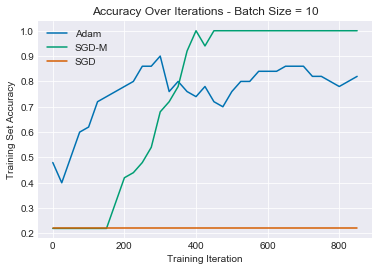

In [90]:
plt.plot(range(0, 851, 25), adam_net.train_acc_history, label='Adam')
plt.plot(range(0, 851, 25), sgdm_net.train_acc_history, label='SGD-M')
plt.plot(range(0, 851, 25), sgd_net.train_acc_history, label='SGD')

plt.xlabel('Training Iteration')
plt.ylabel('Training Set Accuracy')
plt.title("Accuracy Over Iterations - Batch Size = 10")
plt.legend()
plt.show()

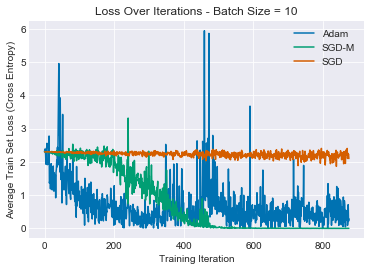

In [91]:
plt.plot(adam_net.loss_history, label='Adam')
plt.plot(sgdm_net.loss_history, label='SGD-M')
plt.plot(sgd_net.loss_history, label='SGD')

plt.xlabel('Training Iteration')
plt.ylabel('Average Train Set Loss (Cross Entropy)')
plt.title("Loss Over Iterations - Batch Size = 10")
plt.legend()
plt.show()

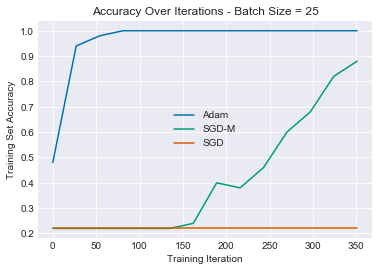

In [92]:
plt.plot(range(0, 352, 27), adam_net1.train_acc_history, label='Adam')
plt.plot(range(0, 352, 27), sgdm_net1.train_acc_history, label='SGD-M')
plt.plot(range(0, 352, 27), sgd_net1.train_acc_history, label='SGD')

plt.xlabel('Training Iteration')
plt.ylabel('Training Set Accuracy')
plt.legend()
plt.title("Accuracy Over Iterations - Batch Size = 25")
plt.show()

**The graph below should be labelled Loss Over Iterations - Batch Size = 25**

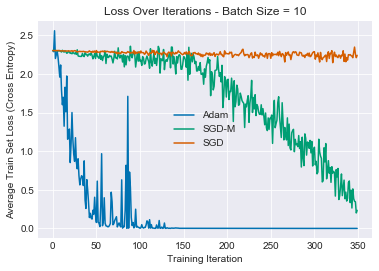

In [94]:
plt.plot(adam_net1.loss_history, label='Adam')
plt.plot(sgdm_net1.loss_history, label='SGD-M')
plt.plot(sgd_net1.loss_history, label='SGD')

plt.xlabel('Training Iteration')
plt.ylabel('Average Train Set Loss (Cross Entropy)')
plt.title("Loss Over Iterations - Batch Size = 10")
plt.legend()
plt.show()

**Impact of Batch Size on Loss & Accuracy for different Optimizers** In the above plots, we see differences, the first plot is done for models created with batch size = 10, while the second plot is done for models creating batch size = 25. We see that SGD-M is able to make quicker changes and develop faster momentum for larger number of iterations, thus manages to converge sooner for smaller batch sizes. This gives us an interesting insight into the momentum variable stacking up over iterations rather than size of data. We also see that adam is more succeptible to noisy loss values and thus performs better in the case that batch size is larger.

**Question 4**: Which optimizer works best and why do think it is best?

**Answer:** Adam seems to work the best, since it converges the fastest to a lower loss value (for bigger batch sizes). This could be because it is able to adapt and dynamically change the extent to which d_wts changes the networks weights. 

**Question 5**: What is happening with the training set accuracy and why?

**Answer:** Accuracy increases for all optimizers over iterations. However, with vanilla SGD this happens very slowly. SGD-M starts off slow, but as the momentum stacks up the network closes in on the optimal solution faster. Adam's accuracy increases the fastest. It seems that Adam and SGD-M are converging to the same final accuracy value, although we know that this is not always the case when using different optimizers.

## Task 7: Training convolutional neural network on STL-10

### 7a) Load in STL-10 at 32x32 resolution

In [4]:
# Download the STL-10 dataset from the internet, convert it to Numpy ndarray, resize to 32x32
# cache it locally on your computer for faster loading next time.
load_stl10_dataset.purge_cached_dataset()
stl_imgs, stl_labels = load_stl10_dataset.load(scale_fact=3)
# preprocess
stl_imgs, stl_labels = preprocess_data.preprocess_stl(stl_imgs, stl_labels)
# create splits
x_train, y_train, x_test, y_test, x_val, y_val, x_dev, y_dev = preprocess_data.create_splits(
    stl_imgs, stl_labels, n_train_samps=4548, n_test_samps=400, n_valid_samps=2, n_dev_samps=50)

print ('Train data shape: ', x_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Test data shape: ', x_test.shape)
print ('Test labels shape: ', y_test.shape)
print ('Validation data shape: ', x_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('dev data shape: ', x_dev.shape)
print ('dev labels shape: ', y_dev.shape)

classes = np.loadtxt(os.path.join('data', 'stl10_binary', 'class_names.txt'), dtype=str)

Images are: (5000, 96, 96, 3)
Labels are: (5000,)
Resizing 5000 images to 32x32...Done!
Saving Numpy arrays the images and labels to ./numpy...Done!
imgs shape before transpose (5000, 32, 32, 3)
imgs shape after transpose (5000, 3, 32, 32)
Train data shape:  (4548, 3, 32, 32)
Train labels shape:  (4548,)
Test data shape:  (400, 3, 32, 32)
Test labels shape:  (400,)
Validation data shape:  (2, 3, 32, 32)
Validation labels shape:  (2,)
dev data shape:  (50, 3, 32, 32)
dev labels shape:  (50,)


### 7b) Set up accelerated convolution and max pooling layers

As you may have noticed, we had to downsize STL-10 to 16x16 resolution to train the network on the dev set (N=50) in a reasonable amount of time. The training set is N=4000, how will we ever manage to process that amount of data!?

On one hand, this is an unfortunate inevitable reality of working with large ("big") datasets: you can easily find a dataset that is too time consuming to process for any computer, despite how fast/many CPU/GPUs it has.

On the other hand, we can do better for this project and STL-10 :) If you were to time (profile) different parts of the training process, you'd notice that largest bottleneck is convolution and max pooling operations (both forward/backward). You implemented those operations intuitively, which does not always yield the best performance. **By swapping out forward/backward convolution and maxpooling for implementations that use different algorithms (im2col, reshaping) that are compiled to C code, we will speed up training up by several orders of magnitude**.

Follow these steps to subsitute in the "accelerated" convolution and max pooling layers.

- Install the `cython` python package: `pip3 install cython` (or `pip3 install cython --user` if working in Davis 102)
- Dowload files `im2col_cython.pyx`, `accelerated_layer.py`, `setup.py` from the project website. Put them in your base project folder.
- Open terminal, `cd` to Project directory.
- Compile the im2col functions: `python3 setup.py build_ext --inplace`. A `.c` and `.so` file should have appeared in your project folder.
- Restart Jupyter Notebook kernel
- Create a class called `Conv4NetAccel` in `network.py` by copy-pasting the contents of `Conv4Net`. Import `accelerated_layer` at the top and replace the `Conv2D` and `MaxPool2D` layers with `Conv2DAccel` and `MaxPool2DAccel`.

### 7c) Training convolutional neural network on STL-10

You are now ready to train on the entire training set.

- Create a `Conv4NetAccel` object with hyperparameters of your choice.
- Your goal is to achieve 45% accuracy on the test and/or validation set.

Notes:

- I suggest using your intuition about hyperparameters and over/underfitting to guide your choice, rather than a grid search. This should not be overly challenging.
- Use the best / most efficient optimizer based on your prior analysis.
- It should take on the order of 1 sec per training iteration. If that's way off, seek help as something could be wrong with running the acclerated code.

In [66]:
from network import convNet4Accel

# Adam
adam_net_accel = convNet4Accel(input_shape=(3, 32, 32), wt_scale=1e-2, verbose=False)
adam_net_accel.compile("Adam")

adam_net_accel.fit(x_train, y_train, x_val, y_val, mini_batch_sz=25, n_epochs=20, acc_freq=25)


Starting to train...
3620 iterations. 181 iter/epoch.
iteration: 0 | loss: 2.301284
iteration: 1 | loss: 2.302109
iteration: 2 | loss: 2.296336
iteration: 3 | loss: 2.304156
iteration: 4 | loss: 2.303676
iteration: 5 | loss: 2.286080
iteration: 6 | loss: 2.267168
iteration: 7 | loss: 2.281272
iteration: 8 | loss: 2.276506
iteration: 9 | loss: 2.238647
iteration: 10 | loss: 2.179864
iteration: 11 | loss: 2.231117
iteration: 12 | loss: 2.239172
iteration: 13 | loss: 2.211096
iteration: 14 | loss: 2.134568
iteration: 15 | loss: 2.212462
iteration: 16 | loss: 2.230874
iteration: 17 | loss: 2.112933
iteration: 18 | loss: 2.121093
iteration: 19 | loss: 2.053386
iteration: 20 | loss: 1.900341
iteration: 21 | loss: 1.814798
iteration: 22 | loss: 2.413750
iteration: 23 | loss: 2.036419
iteration: 24 | loss: 2.069883
  Train acc: 0.22, Val acc: 0.0
iteration: 25 | loss: 1.944504
iteration: 26 | loss: 1.858502
iteration: 27 | loss: 1.995618
iteration: 28 | loss: 1.998732
iteration: 29 | loss: 2.0

  Train acc: 0.444, Val acc: 0.0
iteration: 250 | loss: 1.299751
iteration: 251 | loss: 1.315879
iteration: 252 | loss: 1.558714
iteration: 253 | loss: 1.563832
iteration: 254 | loss: 1.508371
iteration: 255 | loss: 1.412986
iteration: 256 | loss: 1.386223
iteration: 257 | loss: 1.448244
iteration: 258 | loss: 1.481134
iteration: 259 | loss: 1.495072
iteration: 260 | loss: 1.454987
iteration: 261 | loss: 1.559469
iteration: 262 | loss: 1.404653
iteration: 263 | loss: 1.265466
iteration: 264 | loss: 1.777141
iteration: 265 | loss: 1.362598
iteration: 266 | loss: 1.059294
iteration: 267 | loss: 1.542713
iteration: 268 | loss: 1.519024
iteration: 269 | loss: 1.427112
iteration: 270 | loss: 1.683756
iteration: 271 | loss: 1.303169
iteration: 272 | loss: 1.871197
iteration: 273 | loss: 1.789834
iteration: 274 | loss: 1.625481
  Train acc: 0.448, Val acc: 0.0
iteration: 275 | loss: 1.138947
iteration: 276 | loss: 1.557726
iteration: 277 | loss: 1.431702
iteration: 278 | loss: 1.422966
iterat

iteration: 498 | loss: 1.541992
iteration: 499 | loss: 1.365055
  Train acc: 0.552, Val acc: 0.5
iteration: 500 | loss: 1.367425
iteration: 501 | loss: 1.292476
iteration: 502 | loss: 1.120444
iteration: 503 | loss: 1.612188
iteration: 504 | loss: 1.059103
iteration: 505 | loss: 0.918752
iteration: 506 | loss: 1.289837
iteration: 507 | loss: 1.189300
iteration: 508 | loss: 1.292218
iteration: 509 | loss: 1.366053
iteration: 510 | loss: 1.255311
iteration: 511 | loss: 1.135128
iteration: 512 | loss: 1.182006
iteration: 513 | loss: 1.517806
iteration: 514 | loss: 1.270506
iteration: 515 | loss: 1.299033
iteration: 516 | loss: 1.244998
iteration: 517 | loss: 1.229405
iteration: 518 | loss: 1.153226
iteration: 519 | loss: 0.936601
iteration: 520 | loss: 1.359198
iteration: 521 | loss: 1.066634
iteration: 522 | loss: 1.136057
iteration: 523 | loss: 1.191299
iteration: 524 | loss: 1.087649
  Train acc: 0.55, Val acc: 0.5
iteration: 525 | loss: 1.307213
iteration: 526 | loss: 1.053039
iterati

iteration: 745 | loss: 0.887410
iteration: 746 | loss: 1.188892
iteration: 747 | loss: 1.282582
iteration: 748 | loss: 1.039988
iteration: 749 | loss: 1.678201
  Train acc: 0.586, Val acc: 0.5
iteration: 750 | loss: 1.199501
iteration: 751 | loss: 1.182259
iteration: 752 | loss: 1.469178
iteration: 753 | loss: 0.924357
iteration: 754 | loss: 1.029372
iteration: 755 | loss: 0.862176
iteration: 756 | loss: 1.224005
iteration: 757 | loss: 1.303027
iteration: 758 | loss: 0.968726
iteration: 759 | loss: 1.225652
iteration: 760 | loss: 1.318071
iteration: 761 | loss: 1.225472
iteration: 762 | loss: 1.272752
iteration: 763 | loss: 1.222610
iteration: 764 | loss: 1.262914
iteration: 765 | loss: 0.941366
iteration: 766 | loss: 1.042775
iteration: 767 | loss: 1.121240
iteration: 768 | loss: 1.370308
iteration: 769 | loss: 1.120622
iteration: 770 | loss: 0.930023
iteration: 771 | loss: 1.313308
iteration: 772 | loss: 1.234285
iteration: 773 | loss: 1.168176
iteration: 774 | loss: 0.947747
  Train

iteration: 992 | loss: 0.640540
iteration: 993 | loss: 0.789525
iteration: 994 | loss: 0.618122
iteration: 995 | loss: 1.309614
iteration: 996 | loss: 0.750846
iteration: 997 | loss: 0.824753
iteration: 998 | loss: 0.868529
iteration: 999 | loss: 1.007109
  Train acc: 0.666, Val acc: 0.5
iteration: 1000 | loss: 1.004677
iteration: 1001 | loss: 0.786307
iteration: 1002 | loss: 0.806393
iteration: 1003 | loss: 1.055626
iteration: 1004 | loss: 0.536022
iteration: 1005 | loss: 0.655144
iteration: 1006 | loss: 1.149509
iteration: 1007 | loss: 0.854266
iteration: 1008 | loss: 0.982078
iteration: 1009 | loss: 0.964411
iteration: 1010 | loss: 0.681751
iteration: 1011 | loss: 0.618195
iteration: 1012 | loss: 0.995018
iteration: 1013 | loss: 1.510879
iteration: 1014 | loss: 0.917657
iteration: 1015 | loss: 0.605564
iteration: 1016 | loss: 0.875494
iteration: 1017 | loss: 0.833348
iteration: 1018 | loss: 0.861756
iteration: 1019 | loss: 0.993240
iteration: 1020 | loss: 0.505316
iteration: 1021 | 

iteration: 1233 | loss: 0.807279
iteration: 1234 | loss: 0.966993
iteration: 1235 | loss: 0.633940
iteration: 1236 | loss: 0.747514
iteration: 1237 | loss: 0.776890
iteration: 1238 | loss: 1.017320
iteration: 1239 | loss: 0.689136
iteration: 1240 | loss: 0.565427
iteration: 1241 | loss: 0.788608
iteration: 1242 | loss: 0.562480
iteration: 1243 | loss: 1.132282
iteration: 1244 | loss: 0.731293
iteration: 1245 | loss: 0.740860
iteration: 1246 | loss: 0.747523
iteration: 1247 | loss: 0.448821
iteration: 1248 | loss: 0.938304
iteration: 1249 | loss: 0.693829
  Train acc: 0.772, Val acc: 0.5
iteration: 1250 | loss: 0.759189
iteration: 1251 | loss: 0.927304
iteration: 1252 | loss: 0.583526
iteration: 1253 | loss: 0.834859
iteration: 1254 | loss: 0.861881
iteration: 1255 | loss: 0.959263
iteration: 1256 | loss: 0.745490
iteration: 1257 | loss: 0.898120
iteration: 1258 | loss: 0.989428
iteration: 1259 | loss: 0.852741
iteration: 1260 | loss: 0.666048
iteration: 1261 | loss: 0.510730
iteration:

iteration: 1473 | loss: 0.723037
iteration: 1474 | loss: 0.699956
  Train acc: 0.774, Val acc: 0.5
iteration: 1475 | loss: 0.856508
iteration: 1476 | loss: 0.483057
iteration: 1477 | loss: 0.488042
iteration: 1478 | loss: 0.394789
iteration: 1479 | loss: 0.538657
iteration: 1480 | loss: 0.366578
iteration: 1481 | loss: 0.905739
iteration: 1482 | loss: 0.604025
iteration: 1483 | loss: 0.646661
iteration: 1484 | loss: 0.378601
iteration: 1485 | loss: 0.716376
iteration: 1486 | loss: 0.785686
iteration: 1487 | loss: 0.567065
iteration: 1488 | loss: 0.455510
iteration: 1489 | loss: 0.449413
iteration: 1490 | loss: 0.477388
iteration: 1491 | loss: 0.641148
iteration: 1492 | loss: 1.069103
iteration: 1493 | loss: 0.955027
iteration: 1494 | loss: 0.537838
iteration: 1495 | loss: 0.712392
iteration: 1496 | loss: 0.345344
iteration: 1497 | loss: 0.359990
iteration: 1498 | loss: 0.447388
iteration: 1499 | loss: 0.250397
  Train acc: 0.834, Val acc: 0.5
iteration: 1500 | loss: 0.512675
iteration:

iteration: 1714 | loss: 0.300714
iteration: 1715 | loss: 0.348166
iteration: 1716 | loss: 0.786221
iteration: 1717 | loss: 0.980112
iteration: 1718 | loss: 0.558077
iteration: 1719 | loss: 0.475864
iteration: 1720 | loss: 0.268884
iteration: 1721 | loss: 0.237923
iteration: 1722 | loss: 0.401939
iteration: 1723 | loss: 0.387365
iteration: 1724 | loss: 0.503022
  Train acc: 0.886, Val acc: 0.5
iteration: 1725 | loss: 1.034063
iteration: 1726 | loss: 0.334875
iteration: 1727 | loss: 0.474702
iteration: 1728 | loss: 0.727333
iteration: 1729 | loss: 0.525884
iteration: 1730 | loss: 0.434056
iteration: 1731 | loss: 0.416803
iteration: 1732 | loss: 0.489136
iteration: 1733 | loss: 0.464163
iteration: 1734 | loss: 0.512907
iteration: 1735 | loss: 0.324635
iteration: 1736 | loss: 0.284796
iteration: 1737 | loss: 0.640932
iteration: 1738 | loss: 0.671253
iteration: 1739 | loss: 0.486594
iteration: 1740 | loss: 0.246279
iteration: 1741 | loss: 0.732085
iteration: 1742 | loss: 0.375838
iteration:

iteration: 1955 | loss: 0.252840
iteration: 1956 | loss: 0.453897
iteration: 1957 | loss: 0.352766
iteration: 1958 | loss: 0.169443
iteration: 1959 | loss: 0.461970
iteration: 1960 | loss: 0.224293
iteration: 1961 | loss: 0.487476
iteration: 1962 | loss: 0.274250
iteration: 1963 | loss: 0.248009
iteration: 1964 | loss: 0.454736
iteration: 1965 | loss: 0.138587
iteration: 1966 | loss: 0.246433
iteration: 1967 | loss: 0.387530
iteration: 1968 | loss: 0.209187
iteration: 1969 | loss: 0.136633
iteration: 1970 | loss: 0.238502
iteration: 1971 | loss: 0.318343
iteration: 1972 | loss: 0.904197
iteration: 1973 | loss: 0.363836
iteration: 1974 | loss: 0.406768
  Train acc: 0.916, Val acc: 0.5
iteration: 1975 | loss: 0.519641
iteration: 1976 | loss: 0.309756
iteration: 1977 | loss: 0.525064
iteration: 1978 | loss: 0.265938
iteration: 1979 | loss: 0.280373
iteration: 1980 | loss: 0.215821
iteration: 1981 | loss: 0.164657
iteration: 1982 | loss: 0.262863
iteration: 1983 | loss: 0.279484
iteration:

iteration: 2195 | loss: 0.184530
iteration: 2196 | loss: 0.308192
iteration: 2197 | loss: 0.226903
iteration: 2198 | loss: 0.669891
iteration: 2199 | loss: 0.193786
  Train acc: 0.954, Val acc: 0.5
iteration: 2200 | loss: 0.295964
iteration: 2201 | loss: 0.141449
iteration: 2202 | loss: 0.309466
iteration: 2203 | loss: 0.258242
iteration: 2204 | loss: 0.393802
iteration: 2205 | loss: 0.154905
iteration: 2206 | loss: 0.140400
iteration: 2207 | loss: 0.298790
iteration: 2208 | loss: 0.159456
iteration: 2209 | loss: 0.354061
iteration: 2210 | loss: 0.174321
iteration: 2211 | loss: 0.203143
iteration: 2212 | loss: 0.470980
iteration: 2213 | loss: 0.255057
iteration: 2214 | loss: 0.278205
iteration: 2215 | loss: 0.086002
iteration: 2216 | loss: 0.374442
iteration: 2217 | loss: 0.076870
iteration: 2218 | loss: 0.436650
iteration: 2219 | loss: 0.117772
iteration: 2220 | loss: 0.156466
iteration: 2221 | loss: 0.241405
iteration: 2222 | loss: 0.317261
iteration: 2223 | loss: 0.328658
iteration:

iteration: 2436 | loss: 0.188822
iteration: 2437 | loss: 0.071605
iteration: 2438 | loss: 0.074704
iteration: 2439 | loss: 0.087850
iteration: 2440 | loss: 0.073582
iteration: 2441 | loss: 0.119920
iteration: 2442 | loss: 0.306543
iteration: 2443 | loss: 0.242717
iteration: 2444 | loss: 0.186752
iteration: 2445 | loss: 0.174837
iteration: 2446 | loss: 0.117472
iteration: 2447 | loss: 0.284229
iteration: 2448 | loss: 0.455124
iteration: 2449 | loss: 0.139959
  Train acc: 0.952, Val acc: 0.5
iteration: 2450 | loss: 0.186477
iteration: 2451 | loss: 0.273759
iteration: 2452 | loss: 0.092687
iteration: 2453 | loss: 0.563192
iteration: 2454 | loss: 0.094597
iteration: 2455 | loss: 0.069960
iteration: 2456 | loss: 0.151247
iteration: 2457 | loss: 0.291768
iteration: 2458 | loss: 0.288327
iteration: 2459 | loss: 0.143315
iteration: 2460 | loss: 0.179353
iteration: 2461 | loss: 0.114132
iteration: 2462 | loss: 0.145369
iteration: 2463 | loss: 0.150503
iteration: 2464 | loss: 0.212344
iteration:

iteration: 2677 | loss: 0.076673
iteration: 2678 | loss: 0.111274
iteration: 2679 | loss: 0.070424
iteration: 2680 | loss: 0.026282
iteration: 2681 | loss: 0.254222
iteration: 2682 | loss: 0.093150
iteration: 2683 | loss: 0.019694
iteration: 2684 | loss: 0.065563
iteration: 2685 | loss: 0.058551
iteration: 2686 | loss: 0.055688
iteration: 2687 | loss: 0.098594
iteration: 2688 | loss: 0.171453
iteration: 2689 | loss: 0.131250
iteration: 2690 | loss: 0.130739
iteration: 2691 | loss: 0.076403
iteration: 2692 | loss: 0.074236
iteration: 2693 | loss: 0.040502
iteration: 2694 | loss: 0.108332
iteration: 2695 | loss: 0.053421
iteration: 2696 | loss: 0.066877
iteration: 2697 | loss: 0.180899
iteration: 2698 | loss: 0.275941
iteration: 2699 | loss: 0.062394
  Train acc: 0.958, Val acc: 0.5
iteration: 2700 | loss: 0.074674
iteration: 2701 | loss: 0.128466
iteration: 2702 | loss: 0.077581
iteration: 2703 | loss: 0.042717
iteration: 2704 | loss: 0.147217
iteration: 2705 | loss: 0.115631
iteration:

iteration: 2917 | loss: 0.043233
iteration: 2918 | loss: 0.020108
iteration: 2919 | loss: 0.277487
iteration: 2920 | loss: 0.083026
iteration: 2921 | loss: 0.040415
iteration: 2922 | loss: 0.024644
iteration: 2923 | loss: 0.079921
iteration: 2924 | loss: 0.191009
  Train acc: 0.978, Val acc: 0.5
iteration: 2925 | loss: 0.102817
iteration: 2926 | loss: 0.084732
iteration: 2927 | loss: 0.027122
iteration: 2928 | loss: 0.073666
iteration: 2929 | loss: 0.089737
iteration: 2930 | loss: 0.176842
iteration: 2931 | loss: 0.056042
iteration: 2932 | loss: 0.017516
iteration: 2933 | loss: 0.033381
iteration: 2934 | loss: 0.053556
iteration: 2935 | loss: 0.111774
iteration: 2936 | loss: 0.034958
iteration: 2937 | loss: 0.036744
iteration: 2938 | loss: 0.461037
iteration: 2939 | loss: 0.061845
iteration: 2940 | loss: 0.040524
iteration: 2941 | loss: 0.351189
iteration: 2942 | loss: 0.054059
iteration: 2943 | loss: 0.187084
iteration: 2944 | loss: 0.076278
iteration: 2945 | loss: 0.111412
iteration:

iteration: 3157 | loss: 0.038702
iteration: 3158 | loss: 0.037870
iteration: 3159 | loss: 0.101570
iteration: 3160 | loss: 0.022615
iteration: 3161 | loss: 0.017135
iteration: 3162 | loss: 0.033482
iteration: 3163 | loss: 0.138018
iteration: 3164 | loss: 0.173376
iteration: 3165 | loss: 0.187812
iteration: 3166 | loss: 0.023182
iteration: 3167 | loss: 0.048924
iteration: 3168 | loss: 0.036977
iteration: 3169 | loss: 0.058997
iteration: 3170 | loss: 0.129533
iteration: 3171 | loss: 0.077655
iteration: 3172 | loss: 0.119673
iteration: 3173 | loss: 0.203933
iteration: 3174 | loss: 0.046898
  Train acc: 0.98, Val acc: 0.5
iteration: 3175 | loss: 0.081082
iteration: 3176 | loss: 0.087581
iteration: 3177 | loss: 0.080584
iteration: 3178 | loss: 0.026317
iteration: 3179 | loss: 0.063540
iteration: 3180 | loss: 0.043881
iteration: 3181 | loss: 0.090470
iteration: 3182 | loss: 0.080238
iteration: 3183 | loss: 0.026957
iteration: 3184 | loss: 0.074032
iteration: 3185 | loss: 0.098613
iteration: 

iteration: 3398 | loss: 0.031131
iteration: 3399 | loss: 0.025458
  Train acc: 0.994, Val acc: 0.5
iteration: 3400 | loss: 0.011835
iteration: 3401 | loss: 0.032634
iteration: 3402 | loss: 0.082772
iteration: 3403 | loss: 0.058779
iteration: 3404 | loss: 0.058903
iteration: 3405 | loss: 0.040285
iteration: 3406 | loss: 0.032081
iteration: 3407 | loss: 0.035411
iteration: 3408 | loss: 0.031825
iteration: 3409 | loss: 0.093168
iteration: 3410 | loss: 0.094908
iteration: 3411 | loss: 0.035852
iteration: 3412 | loss: 0.106571
iteration: 3413 | loss: 0.032616
iteration: 3414 | loss: 0.034714
iteration: 3415 | loss: 0.009226
iteration: 3416 | loss: 0.020204
iteration: 3417 | loss: 0.029563
iteration: 3418 | loss: 0.005911
iteration: 3419 | loss: 0.113010
iteration: 3420 | loss: 0.045796
iteration: 3421 | loss: 0.026855
iteration: 3422 | loss: 0.042362
iteration: 3423 | loss: 0.119643
iteration: 3424 | loss: 0.038923
  Train acc: 0.992, Val acc: 0.5
iteration: 3425 | loss: 0.028875
iteration:

In [67]:
adam_net_accel.accuracy(x_test, y_test)

0.5175

### 7d) Analysis of STL-10 training quality

Use your trained network that achieves 45%+ accuracy on the test set to make "high quality" plots showing the following 

- Plot the accuracy of the training and validation sets as a function of training epoch. You may have to convert iterations to epochs.
- Plot the loss as a function of training iteration.

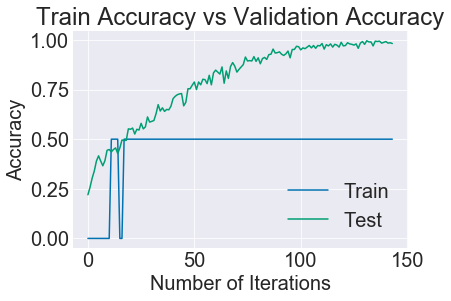

In [180]:
plt.plot(adam_net_accel.validation_acc_history, label='Train')


plt.plot(adam_net_accel.train_acc_history, label='Test')


plt.xlabel("Number of Iterations")
plt.ylabel("Accuracy")
plt.title("Train Accuracy vs Validation Accuracy")
plt.legend()

plt.show()

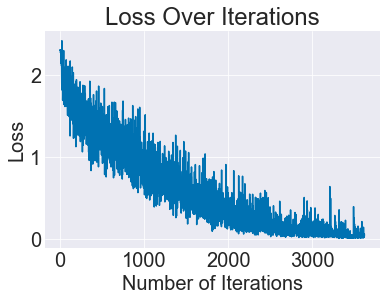

In [181]:
plt.plot(adam_net_accel.loss_history)

plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.title("Loss Over Iterations")

plt.show()

### 7f) Visualize layer weights

Run the following code and submit the inline image of the weight visualization of the 1st layer (convolutional layer) of the network.

**Note:**
- Setting optional parameter to `True` will let you save a .PNG file in your project folder of your weights. I'd suggest setting it to `False` unless look at your weights and they look like they are worth saving. You don't want a training run that produces undesirable weights to overwrite your good looking results!

In [70]:
def plot_weights(wts, saveFig=True, filename='convWts_adam_overfit.png'):
    grid_sz = int(np.sqrt(len(wts)))
    plt.figure(figsize=(10,10))
    for x in range(grid_sz):
        for y in range(grid_sz):
            lin_ind = np.ravel_multi_index((x, y), dims=(grid_sz, grid_sz))
            plt.subplot(grid_sz, grid_sz, lin_ind+1)
            currImg = wts[lin_ind]
            low, high = np.min(currImg), np.max(currImg)
            currImg = 255*(currImg - low) / (high - low)
            currImg = currImg.astype('uint8')
            plt.imshow(currImg)
            plt.gca().axis('off')
    if saveFig:
        plt.savefig('convWts_adam_overfit.png')
    plt.show()

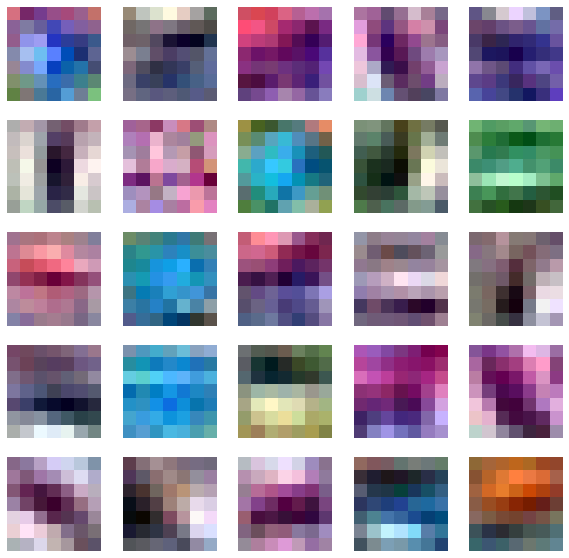

In [12]:
# Subsitute your trained network below
# netT is my network's name
# You shouldn't see RGB noise
plot_weights(adam_net_accel.layers[0].wts.transpose(0, 2, 3, 1), saveFig=False, filename='convWts_adam_train_20epoch.png')

**Question 6:** What do the learned filters look like? Does this make sense to you / is this what you expected? In which area of the brain do these filters resemble cell receptive fields?

Note: you should not see RGB "noise". If you do, and you pass the "overfit" test with the Adam optimizer, you probably need to increase the number of training epochs.

**Answer:** The filters seem to have some structure to them - there are some vertical, horizontal, and diagonal lines, and some center on/center off filters. Since these are the first layer filters, it makes sense that they are very fundamental/simple features. Cells like these are found in the Primary Visual Cortex (V1) of the primate brain as this is a combination of multiple cells from the LGN which forms complex filters.

## Extensions

**General advice:** When making modifications for extensions, make small changes, then check to make sure you pass test code. Also, test out the network runtime on small examples before/after the changes. If you're not careful, the simulation time can become intractable really quickly!

**Remember:** One thorough extension usually is worth more than several "shallow" extensions.

### 1. Save and load networks

For this extension we implemented the ability to save and load any kind of network after it has been trained. This extension followed naturally from a fear of having to rerun the entire notebook with its long runtime in the event our Kernel was interrupted and we lost our network variables.

To implement the extension, we wrote the networks hyperparams and weights to a text file, and then parse this text file to recreate the network later.

In [71]:
adam_net_accel.save_model("adam_net_accel.txt")
print("Accuracy of the original network: ",adam_net_accel.accuracy(x_test, y_test))

#Create a new network
loaded_adam_net_accel = convNet4Accel(input_shape=(3, 32, 32), wt_scale=1e-2, verbose=False)

#Load the trained net into the newly created network
loaded_adam_net_accel.load_model("adam_net_accel.txt")
print("Accuracy of the new network: ",loaded_adam_net_accel.accuracy(x_test, y_test))

Accuracy of the original network:  0.5175
loading  Neural Network Model

Accuracy of the new network:  0.5175


### 2. High Accuracy on STL-10

We were able to achieve a high accuracy on the STL-10 dataset when we used a mini-batch size of 25, over 20 epochs, a weight-scale of 0.01, and a regularization of 0. The resulting accuracy was 51%.

### 3. Experiment with different network architectures.

The design of the `Network` class is modular. As long as you're careful about shapes, adding/removing network layers (e.g. `Conv2D`, `Dense`, etc.) should be straight forward. Experiment with adding another sequence of `Conv2D` and `MaxPooling2D` layers. Add another `Dense` hidden layer before the output layer. How do the changes affect classification accuracy and loss? 

### 4. Exploring convolutional kernerls:

We decided to toy with the number and size of convolutional kernels in our network. The original network was 32 7x7 kernels; we explore a 64 3x3 network as well as a 32 9x9 network.

We find that despite the 64 3x3 network having only about a third as many weights in the convolutional layer, we do not lose out on any performance (it actually increases by 0.5%). This is promising, since we have a much smaller yet capable network. The filters still look like they are encoding some basic information, such as lines in different orientations and spots.

For the 32 9x9 network, we see that despite an almost double increase in the number of weights in the model, we see that the accuracy does not improve (infact it decreases by 1.5%). This is in line with our predictions as although we use the same amount of kernels (32) the larger initial Convolution layers result in location specific features and larger features that would be quite image specific. However, the increase in the number of weights allows us more room to improve our model, these come to balance out eachother to result in only a small decrease in the accuracy. We do however, see some interesting filters. These filters encode large amounts of information as predicted, such as spherical looking objects, large gradients in colors, and bigger structures. 

In [77]:
from network import convNet4AccelSmallKernels
adam_small_ker_accel = convNet4AccelSmallKernels(input_shape=(3, 32, 32), wt_scale=1e-2, verbose=False)
adam_small_ker_accel.compile("Adam")
adam_small_ker_accel.fit(x_train, y_train, x_val, y_val, mini_batch_sz=25, n_epochs=20, acc_freq=25)

Starting to train...
3620 iterations. 181 iter/epoch.
iteration: 0 | loss: 2.304380
iteration: 1 | loss: 2.305613
iteration: 2 | loss: 2.300858
iteration: 3 | loss: 2.309360
iteration: 4 | loss: 2.300884
iteration: 5 | loss: 2.297068
iteration: 6 | loss: 2.305005
iteration: 7 | loss: 2.296763
iteration: 8 | loss: 2.304207
iteration: 9 | loss: 2.293069
iteration: 10 | loss: 2.272635
iteration: 11 | loss: 2.302707
iteration: 12 | loss: 2.277796
iteration: 13 | loss: 2.262089
iteration: 14 | loss: 2.273206
iteration: 15 | loss: 2.274984
iteration: 16 | loss: 2.294863
iteration: 17 | loss: 2.265246
iteration: 18 | loss: 2.265383
iteration: 19 | loss: 2.240906
iteration: 20 | loss: 2.249753
iteration: 21 | loss: 2.205706
iteration: 22 | loss: 2.227339
iteration: 23 | loss: 2.117598
iteration: 24 | loss: 2.099524
  Train acc: 0.206, Val acc: 0.0
iteration: 25 | loss: 2.115364
iteration: 26 | loss: 2.208562
iteration: 27 | loss: 2.158541
iteration: 28 | loss: 2.216174
iteration: 29 | loss: 2.

  Train acc: 0.468, Val acc: 0.0
iteration: 250 | loss: 1.181299
iteration: 251 | loss: 1.634419
iteration: 252 | loss: 1.570108
iteration: 253 | loss: 1.596555
iteration: 254 | loss: 1.847137
iteration: 255 | loss: 1.384558
iteration: 256 | loss: 1.224932
iteration: 257 | loss: 1.705106
iteration: 258 | loss: 1.496401
iteration: 259 | loss: 1.384873
iteration: 260 | loss: 1.190441
iteration: 261 | loss: 1.441613
iteration: 262 | loss: 1.360549
iteration: 263 | loss: 1.628536
iteration: 264 | loss: 1.566020
iteration: 265 | loss: 1.363994
iteration: 266 | loss: 1.248847
iteration: 267 | loss: 1.334624
iteration: 268 | loss: 1.156125
iteration: 269 | loss: 1.449277
iteration: 270 | loss: 1.398952
iteration: 271 | loss: 1.187636
iteration: 272 | loss: 1.170562
iteration: 273 | loss: 1.416273
iteration: 274 | loss: 1.335761
  Train acc: 0.428, Val acc: 0.0
iteration: 275 | loss: 1.554484
iteration: 276 | loss: 1.435991
iteration: 277 | loss: 1.422310
iteration: 278 | loss: 1.415911
iterat

iteration: 496 | loss: 1.159190
iteration: 497 | loss: 1.324320
iteration: 498 | loss: 1.520655
iteration: 499 | loss: 1.132839
  Train acc: 0.552, Val acc: 0.5
iteration: 500 | loss: 1.266906
iteration: 501 | loss: 1.093410
iteration: 502 | loss: 0.943353
iteration: 503 | loss: 1.291688
iteration: 504 | loss: 1.175563
iteration: 505 | loss: 0.945818
iteration: 506 | loss: 0.887339
iteration: 507 | loss: 1.270420
iteration: 508 | loss: 1.123615
iteration: 509 | loss: 1.483538
iteration: 510 | loss: 1.549443
iteration: 511 | loss: 1.073166
iteration: 512 | loss: 1.577673
iteration: 513 | loss: 1.131713
iteration: 514 | loss: 1.401131
iteration: 515 | loss: 1.337890
iteration: 516 | loss: 1.160479
iteration: 517 | loss: 1.173369
iteration: 518 | loss: 1.128001
iteration: 519 | loss: 1.207886
iteration: 520 | loss: 1.373120
iteration: 521 | loss: 1.109814
iteration: 522 | loss: 1.468781
iteration: 523 | loss: 1.065416
iteration: 524 | loss: 1.297050
  Train acc: 0.578, Val acc: 0.5
iterat

iteration: 742 | loss: 0.693338
iteration: 743 | loss: 1.088378
iteration: 744 | loss: 1.077348
iteration: 745 | loss: 0.933288
iteration: 746 | loss: 0.757417
iteration: 747 | loss: 1.135377
iteration: 748 | loss: 1.192946
iteration: 749 | loss: 0.783545
  Train acc: 0.668, Val acc: 0.5
iteration: 750 | loss: 1.219847
iteration: 751 | loss: 1.071125
iteration: 752 | loss: 0.993168
iteration: 753 | loss: 1.164037
iteration: 754 | loss: 0.898825
iteration: 755 | loss: 0.947939
iteration: 756 | loss: 1.156330
iteration: 757 | loss: 1.071362
iteration: 758 | loss: 0.875812
iteration: 759 | loss: 1.003259
iteration: 760 | loss: 0.903034
iteration: 761 | loss: 0.790723
iteration: 762 | loss: 1.231256
iteration: 763 | loss: 0.833267
iteration: 764 | loss: 0.854900
iteration: 765 | loss: 0.485568
iteration: 766 | loss: 0.882214
iteration: 767 | loss: 0.977174
iteration: 768 | loss: 1.212382
iteration: 769 | loss: 0.968512
iteration: 770 | loss: 1.168375
iteration: 771 | loss: 1.172360
iterati

iteration: 988 | loss: 0.648049
iteration: 989 | loss: 0.842950
iteration: 990 | loss: 0.791462
iteration: 991 | loss: 0.477963
iteration: 992 | loss: 0.607029
iteration: 993 | loss: 0.915258
iteration: 994 | loss: 0.609588
iteration: 995 | loss: 0.771576
iteration: 996 | loss: 0.612846
iteration: 997 | loss: 0.970601
iteration: 998 | loss: 0.619492
iteration: 999 | loss: 0.975018
  Train acc: 0.728, Val acc: 0.5
iteration: 1000 | loss: 0.628166
iteration: 1001 | loss: 0.603585
iteration: 1002 | loss: 0.748823
iteration: 1003 | loss: 1.028960
iteration: 1004 | loss: 1.205501
iteration: 1005 | loss: 0.829200
iteration: 1006 | loss: 0.760235
iteration: 1007 | loss: 0.801443
iteration: 1008 | loss: 1.005163
iteration: 1009 | loss: 0.649290
iteration: 1010 | loss: 0.613426
iteration: 1011 | loss: 0.737380
iteration: 1012 | loss: 1.009991
iteration: 1013 | loss: 0.694942
iteration: 1014 | loss: 0.653771
iteration: 1015 | loss: 0.613667
iteration: 1016 | loss: 0.894456
iteration: 1017 | loss

iteration: 1228 | loss: 0.506147
iteration: 1229 | loss: 0.688741
iteration: 1230 | loss: 0.283644
iteration: 1231 | loss: 0.799883
iteration: 1232 | loss: 0.403483
iteration: 1233 | loss: 0.430889
iteration: 1234 | loss: 0.500834
iteration: 1235 | loss: 1.066033
iteration: 1236 | loss: 0.808256
iteration: 1237 | loss: 0.354924
iteration: 1238 | loss: 0.839538
iteration: 1239 | loss: 0.554329
iteration: 1240 | loss: 0.377344
iteration: 1241 | loss: 0.492113
iteration: 1242 | loss: 0.410478
iteration: 1243 | loss: 0.582329
iteration: 1244 | loss: 0.387339
iteration: 1245 | loss: 0.577232
iteration: 1246 | loss: 0.515889
iteration: 1247 | loss: 0.420715
iteration: 1248 | loss: 0.510551
iteration: 1249 | loss: 0.682989
  Train acc: 0.8, Val acc: 0.5
iteration: 1250 | loss: 0.538883
iteration: 1251 | loss: 0.887221
iteration: 1252 | loss: 0.633370
iteration: 1253 | loss: 0.516606
iteration: 1254 | loss: 0.333711
iteration: 1255 | loss: 0.612839
iteration: 1256 | loss: 0.422851
iteration: 1

iteration: 1469 | loss: 0.486550
iteration: 1470 | loss: 0.534113
iteration: 1471 | loss: 0.430285
iteration: 1472 | loss: 0.330938
iteration: 1473 | loss: 0.649990
iteration: 1474 | loss: 0.604231
  Train acc: 0.86, Val acc: 0.5
iteration: 1475 | loss: 0.295786
iteration: 1476 | loss: 0.374093
iteration: 1477 | loss: 0.435936
iteration: 1478 | loss: 0.492887
iteration: 1479 | loss: 0.382886
iteration: 1480 | loss: 0.534680
iteration: 1481 | loss: 0.362070
iteration: 1482 | loss: 0.377814
iteration: 1483 | loss: 0.431285
iteration: 1484 | loss: 0.398937
iteration: 1485 | loss: 0.339444
iteration: 1486 | loss: 0.444395
iteration: 1487 | loss: 0.754892
iteration: 1488 | loss: 0.352086
iteration: 1489 | loss: 0.339000
iteration: 1490 | loss: 0.448824
iteration: 1491 | loss: 0.420697
iteration: 1492 | loss: 0.478979
iteration: 1493 | loss: 0.296556
iteration: 1494 | loss: 0.410956
iteration: 1495 | loss: 0.469769
iteration: 1496 | loss: 0.388682
iteration: 1497 | loss: 0.406577
iteration: 

iteration: 1708 | loss: 0.133003
iteration: 1709 | loss: 0.262235
iteration: 1710 | loss: 0.294978
iteration: 1711 | loss: 0.595842
iteration: 1712 | loss: 0.202514
iteration: 1713 | loss: 0.233203
iteration: 1714 | loss: 0.461085
iteration: 1715 | loss: 0.242346
iteration: 1716 | loss: 0.206081
iteration: 1717 | loss: 0.162305
iteration: 1718 | loss: 0.271250
iteration: 1719 | loss: 0.224584
iteration: 1720 | loss: 0.148753
iteration: 1721 | loss: 0.297243
iteration: 1722 | loss: 0.365555
iteration: 1723 | loss: 0.417812
iteration: 1724 | loss: 0.324878
  Train acc: 0.926, Val acc: 0.5
iteration: 1725 | loss: 0.358477
iteration: 1726 | loss: 0.229844
iteration: 1727 | loss: 0.316898
iteration: 1728 | loss: 0.356732
iteration: 1729 | loss: 0.325121
iteration: 1730 | loss: 0.215593
iteration: 1731 | loss: 0.689432
iteration: 1732 | loss: 0.261646
iteration: 1733 | loss: 0.465976
iteration: 1734 | loss: 0.375253
iteration: 1735 | loss: 0.256123
iteration: 1736 | loss: 0.421903
iteration:

iteration: 1948 | loss: 0.166496
iteration: 1949 | loss: 0.153686
  Train acc: 0.948, Val acc: 0.5
iteration: 1950 | loss: 0.118145
iteration: 1951 | loss: 0.108230
iteration: 1952 | loss: 0.358989
iteration: 1953 | loss: 0.296174
iteration: 1954 | loss: 0.207882
iteration: 1955 | loss: 0.181074
iteration: 1956 | loss: 0.086795
iteration: 1957 | loss: 0.146543
iteration: 1958 | loss: 0.177333
iteration: 1959 | loss: 0.080835
iteration: 1960 | loss: 0.146865
iteration: 1961 | loss: 0.104653
iteration: 1962 | loss: 0.314349
iteration: 1963 | loss: 0.106372
iteration: 1964 | loss: 0.167976
iteration: 1965 | loss: 0.133289
iteration: 1966 | loss: 0.346134
iteration: 1967 | loss: 0.157226
iteration: 1968 | loss: 0.176684
iteration: 1969 | loss: 0.110736
iteration: 1970 | loss: 0.202991
iteration: 1971 | loss: 0.382016
iteration: 1972 | loss: 0.241255
iteration: 1973 | loss: 0.104887
iteration: 1974 | loss: 0.203662
  Train acc: 0.934, Val acc: 0.5
iteration: 1975 | loss: 0.352536
iteration:

iteration: 2188 | loss: 0.239083
iteration: 2189 | loss: 0.246958
iteration: 2190 | loss: 0.095236
iteration: 2191 | loss: 0.062118
iteration: 2192 | loss: 0.269188
iteration: 2193 | loss: 0.196523
iteration: 2194 | loss: 0.109569
iteration: 2195 | loss: 0.098970
iteration: 2196 | loss: 0.120655
iteration: 2197 | loss: 0.104608
iteration: 2198 | loss: 0.050953
iteration: 2199 | loss: 0.039670
  Train acc: 0.98, Val acc: 0.5
iteration: 2200 | loss: 0.184344
iteration: 2201 | loss: 0.058789
iteration: 2202 | loss: 0.110582
iteration: 2203 | loss: 0.253569
iteration: 2204 | loss: 0.085410
iteration: 2205 | loss: 0.045424
iteration: 2206 | loss: 0.066769
iteration: 2207 | loss: 0.157833
iteration: 2208 | loss: 0.045489
iteration: 2209 | loss: 0.076619
iteration: 2210 | loss: 0.072630
iteration: 2211 | loss: 0.175373
iteration: 2212 | loss: 0.211680
iteration: 2213 | loss: 0.091534
iteration: 2214 | loss: 0.032069
iteration: 2215 | loss: 0.115112
iteration: 2216 | loss: 0.115909
iteration: 

iteration: 2428 | loss: 0.034036
iteration: 2429 | loss: 0.050836
iteration: 2430 | loss: 0.174650
iteration: 2431 | loss: 0.298857
iteration: 2432 | loss: 0.027843
iteration: 2433 | loss: 0.114575
iteration: 2434 | loss: 0.027163
iteration: 2435 | loss: 0.188574
iteration: 2436 | loss: 0.061507
iteration: 2437 | loss: 0.059911
iteration: 2438 | loss: 0.085225
iteration: 2439 | loss: 0.055017
iteration: 2440 | loss: 0.098974
iteration: 2441 | loss: 0.047091
iteration: 2442 | loss: 0.143088
iteration: 2443 | loss: 0.098214
iteration: 2444 | loss: 0.178607
iteration: 2445 | loss: 0.036681
iteration: 2446 | loss: 0.047501
iteration: 2447 | loss: 0.102759
iteration: 2448 | loss: 0.058695
iteration: 2449 | loss: 0.048137
  Train acc: 0.998, Val acc: 0.5
iteration: 2450 | loss: 0.067077
iteration: 2451 | loss: 0.042602
iteration: 2452 | loss: 0.044809
iteration: 2453 | loss: 0.189136
iteration: 2454 | loss: 0.062516
iteration: 2455 | loss: 0.052112
iteration: 2456 | loss: 0.036113
iteration:

iteration: 2669 | loss: 0.023780
iteration: 2670 | loss: 0.078785
iteration: 2671 | loss: 0.032173
iteration: 2672 | loss: 0.081755
iteration: 2673 | loss: 0.021692
iteration: 2674 | loss: 0.221062
  Train acc: 0.982, Val acc: 0.5
iteration: 2675 | loss: 0.025956
iteration: 2676 | loss: 0.088322
iteration: 2677 | loss: 0.042036
iteration: 2678 | loss: 0.107292
iteration: 2679 | loss: 0.014822
iteration: 2680 | loss: 0.045541
iteration: 2681 | loss: 0.061992
iteration: 2682 | loss: 0.032504
iteration: 2683 | loss: 0.086412
iteration: 2684 | loss: 0.046233
iteration: 2685 | loss: 0.135206
iteration: 2686 | loss: 0.015839
iteration: 2687 | loss: 0.027760
iteration: 2688 | loss: 0.017445
iteration: 2689 | loss: 0.021509
iteration: 2690 | loss: 0.075485
iteration: 2691 | loss: 0.039920
iteration: 2692 | loss: 0.060794
iteration: 2693 | loss: 0.033746
iteration: 2694 | loss: 0.028641
iteration: 2695 | loss: 0.073550
iteration: 2696 | loss: 0.024678
iteration: 2697 | loss: 0.037373
iteration:

iteration: 2909 | loss: 0.028263
iteration: 2910 | loss: 0.015668
iteration: 2911 | loss: 0.042186
iteration: 2912 | loss: 0.011971
iteration: 2913 | loss: 0.014519
iteration: 2914 | loss: 0.005887
iteration: 2915 | loss: 0.022033
iteration: 2916 | loss: 0.010556
iteration: 2917 | loss: 0.036794
iteration: 2918 | loss: 0.022980
iteration: 2919 | loss: 0.019357
iteration: 2920 | loss: 0.023331
iteration: 2921 | loss: 0.013523
iteration: 2922 | loss: 0.011289
iteration: 2923 | loss: 0.078323
iteration: 2924 | loss: 0.031708
  Train acc: 0.99, Val acc: 0.5
iteration: 2925 | loss: 0.060720
iteration: 2926 | loss: 0.028376
iteration: 2927 | loss: 0.080250
iteration: 2928 | loss: 0.189830
iteration: 2929 | loss: 0.005471
iteration: 2930 | loss: 0.047945
iteration: 2931 | loss: 0.014442
iteration: 2932 | loss: 0.015410
iteration: 2933 | loss: 0.023667
iteration: 2934 | loss: 0.043557
iteration: 2935 | loss: 0.067697
iteration: 2936 | loss: 0.122060
iteration: 2937 | loss: 0.019574
iteration: 

  Train acc: 0.994, Val acc: 0.5
iteration: 3150 | loss: 0.023479
iteration: 3151 | loss: 0.069524
iteration: 3152 | loss: 0.029440
iteration: 3153 | loss: 0.123378
iteration: 3154 | loss: 0.055888
iteration: 3155 | loss: 0.005603
iteration: 3156 | loss: 0.052133
iteration: 3157 | loss: 0.020465
iteration: 3158 | loss: 0.075270
iteration: 3159 | loss: 0.019140
iteration: 3160 | loss: 0.032913
iteration: 3161 | loss: 0.173138
iteration: 3162 | loss: 0.042473
iteration: 3163 | loss: 0.016148
iteration: 3164 | loss: 0.028367
iteration: 3165 | loss: 0.012071
iteration: 3166 | loss: 0.018618
iteration: 3167 | loss: 0.098119
iteration: 3168 | loss: 0.052035
iteration: 3169 | loss: 0.055076
iteration: 3170 | loss: 0.063293
iteration: 3171 | loss: 0.019880
iteration: 3172 | loss: 0.025623
iteration: 3173 | loss: 0.017138
iteration: 3174 | loss: 0.016662
  Train acc: 0.996, Val acc: 0.5
iteration: 3175 | loss: 0.055883
iteration: 3176 | loss: 0.031172
iteration: 3177 | loss: 0.028519
iteration:

iteration: 3390 | loss: 0.011754
iteration: 3391 | loss: 0.037407
iteration: 3392 | loss: 0.061760
iteration: 3393 | loss: 0.008141
iteration: 3394 | loss: 0.013453
iteration: 3395 | loss: 0.010439
iteration: 3396 | loss: 0.054587
iteration: 3397 | loss: 0.010505
iteration: 3398 | loss: 0.014799
iteration: 3399 | loss: 0.007614
  Train acc: 0.998, Val acc: 0.5
iteration: 3400 | loss: 0.018732
iteration: 3401 | loss: 0.009611
iteration: 3402 | loss: 0.023866
iteration: 3403 | loss: 0.021620
iteration: 3404 | loss: 0.022144
iteration: 3405 | loss: 0.018487
iteration: 3406 | loss: 0.009590
iteration: 3407 | loss: 0.008787
iteration: 3408 | loss: 0.032493
iteration: 3409 | loss: 0.004323
iteration: 3410 | loss: 0.018045
iteration: 3411 | loss: 0.047220
iteration: 3412 | loss: 0.047591
iteration: 3413 | loss: 0.012352
iteration: 3414 | loss: 0.031091
iteration: 3415 | loss: 0.008559
iteration: 3416 | loss: 0.014181
iteration: 3417 | loss: 0.021750
iteration: 3418 | loss: 0.019031
iteration:

In [78]:
adam_small_ker_accel.accuracy(x_test, y_test)

0.525

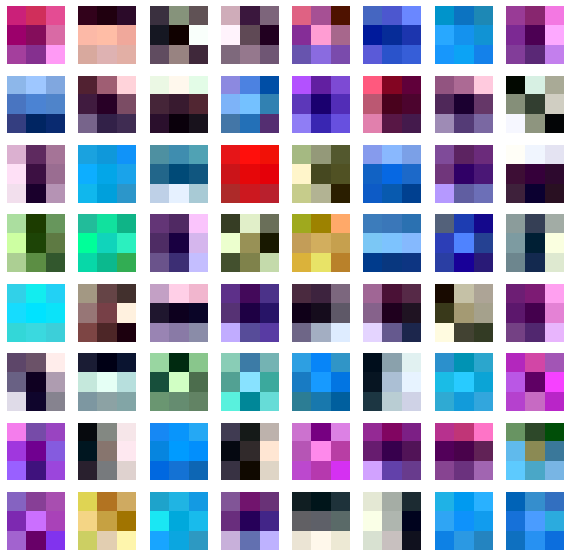

In [81]:
plot_weights(adam_small_ker_accel.layers[0].wts.transpose(0, 2, 3, 1), saveFig=False, filename='convWts_adam_train_20epoch.png')

In [80]:
from network import convNet4AccelBigKernels
adam_big_ker_accel = convNet4AccelBigKernels(input_shape=(3, 32, 32), wt_scale=1e-2, verbose=False)
adam_big_ker_accel.compile("Adam")
adam_big_ker_accel.fit(x_train, y_train, x_val, y_val, mini_batch_sz=25, n_epochs=20, acc_freq=25)

Starting to train...
3620 iterations. 181 iter/epoch.
iteration: 0 | loss: 2.302447
iteration: 1 | loss: 2.303018
iteration: 2 | loss: 2.289785
iteration: 3 | loss: 2.290967
iteration: 4 | loss: 2.278074
iteration: 5 | loss: 2.275007
iteration: 6 | loss: 2.371063
iteration: 7 | loss: 2.313193
iteration: 8 | loss: 2.264168
iteration: 9 | loss: 2.251530
iteration: 10 | loss: 2.278035
iteration: 11 | loss: 2.256010
iteration: 12 | loss: 2.166868
iteration: 13 | loss: 2.224917
iteration: 14 | loss: 2.200451
iteration: 15 | loss: 2.242534
iteration: 16 | loss: 2.213744
iteration: 17 | loss: 2.110305
iteration: 18 | loss: 2.166846
iteration: 19 | loss: 1.966621
iteration: 20 | loss: 2.046005
iteration: 21 | loss: 2.152372
iteration: 22 | loss: 1.987536
iteration: 23 | loss: 2.045974
iteration: 24 | loss: 1.982274
  Train acc: 0.31, Val acc: 0.0
iteration: 25 | loss: 1.985258
iteration: 26 | loss: 1.848829
iteration: 27 | loss: 1.906644
iteration: 28 | loss: 1.866015
iteration: 29 | loss: 1.8

  Train acc: 0.448, Val acc: 0.0
iteration: 250 | loss: 1.645616
iteration: 251 | loss: 1.241349
iteration: 252 | loss: 1.420743
iteration: 253 | loss: 1.146753
iteration: 254 | loss: 1.682948
iteration: 255 | loss: 2.036678
iteration: 256 | loss: 1.299533
iteration: 257 | loss: 1.678522
iteration: 258 | loss: 1.625533
iteration: 259 | loss: 1.731495
iteration: 260 | loss: 1.558547
iteration: 261 | loss: 1.470961
iteration: 262 | loss: 1.597250
iteration: 263 | loss: 1.584206
iteration: 264 | loss: 1.378216
iteration: 265 | loss: 1.430854
iteration: 266 | loss: 1.412296
iteration: 267 | loss: 1.244141
iteration: 268 | loss: 1.381669
iteration: 269 | loss: 1.609090
iteration: 270 | loss: 1.576639
iteration: 271 | loss: 1.277531
iteration: 272 | loss: 1.498808
iteration: 273 | loss: 1.205967
iteration: 274 | loss: 1.480644
  Train acc: 0.37, Val acc: 0.0
iteration: 275 | loss: 1.428660
iteration: 276 | loss: 1.895276
iteration: 277 | loss: 1.286907
iteration: 278 | loss: 1.110847
iterati

iteration: 496 | loss: 1.415816
iteration: 497 | loss: 1.383948
iteration: 498 | loss: 1.223904
iteration: 499 | loss: 1.181841
  Train acc: 0.518, Val acc: 0.0
iteration: 500 | loss: 1.072090
iteration: 501 | loss: 1.179704
iteration: 502 | loss: 1.086606
iteration: 503 | loss: 1.336985
iteration: 504 | loss: 1.334282
iteration: 505 | loss: 1.450412
iteration: 506 | loss: 1.156871
iteration: 507 | loss: 1.134926
iteration: 508 | loss: 1.228993
iteration: 509 | loss: 1.359856
iteration: 510 | loss: 1.218083
iteration: 511 | loss: 1.312823
iteration: 512 | loss: 1.151178
iteration: 513 | loss: 1.412983
iteration: 514 | loss: 1.185369
iteration: 515 | loss: 1.178417
iteration: 516 | loss: 1.629110
iteration: 517 | loss: 1.054567
iteration: 518 | loss: 1.570115
iteration: 519 | loss: 1.006452
iteration: 520 | loss: 1.276861
iteration: 521 | loss: 1.196264
iteration: 522 | loss: 1.394707
iteration: 523 | loss: 1.099913
iteration: 524 | loss: 1.442989
  Train acc: 0.594, Val acc: 0.0
iterat

iteration: 742 | loss: 0.974234
iteration: 743 | loss: 1.488879
iteration: 744 | loss: 0.936485
iteration: 745 | loss: 0.978814
iteration: 746 | loss: 0.612789
iteration: 747 | loss: 0.911261
iteration: 748 | loss: 0.813591
iteration: 749 | loss: 1.045676
  Train acc: 0.618, Val acc: 0.0
iteration: 750 | loss: 1.098820
iteration: 751 | loss: 0.953575
iteration: 752 | loss: 0.979799
iteration: 753 | loss: 0.945272
iteration: 754 | loss: 0.989617
iteration: 755 | loss: 1.522893
iteration: 756 | loss: 1.408029
iteration: 757 | loss: 0.861258
iteration: 758 | loss: 0.898212
iteration: 759 | loss: 1.056830
iteration: 760 | loss: 1.044037
iteration: 761 | loss: 1.045521
iteration: 762 | loss: 1.493870
iteration: 763 | loss: 1.101319
iteration: 764 | loss: 0.829571
iteration: 765 | loss: 1.237495
iteration: 766 | loss: 1.168051
iteration: 767 | loss: 0.780781
iteration: 768 | loss: 0.707591
iteration: 769 | loss: 1.199627
iteration: 770 | loss: 1.124228
iteration: 771 | loss: 1.374408
iterati

iteration: 988 | loss: 0.936944
iteration: 989 | loss: 0.942437
iteration: 990 | loss: 1.077495
iteration: 991 | loss: 1.260037
iteration: 992 | loss: 0.853808
iteration: 993 | loss: 0.931240
iteration: 994 | loss: 1.167646
iteration: 995 | loss: 0.742802
iteration: 996 | loss: 0.885945
iteration: 997 | loss: 0.806535
iteration: 998 | loss: 0.997101
iteration: 999 | loss: 0.778178
  Train acc: 0.726, Val acc: 0.5
iteration: 1000 | loss: 1.007281
iteration: 1001 | loss: 0.827744
iteration: 1002 | loss: 0.711082
iteration: 1003 | loss: 0.898480
iteration: 1004 | loss: 0.959194
iteration: 1005 | loss: 0.786676
iteration: 1006 | loss: 0.844513
iteration: 1007 | loss: 0.959847
iteration: 1008 | loss: 0.970967
iteration: 1009 | loss: 0.842137
iteration: 1010 | loss: 0.773806
iteration: 1011 | loss: 0.469796
iteration: 1012 | loss: 0.768641
iteration: 1013 | loss: 1.050184
iteration: 1014 | loss: 0.715098
iteration: 1015 | loss: 0.762993
iteration: 1016 | loss: 1.048460
iteration: 1017 | loss

iteration: 1228 | loss: 0.988935
iteration: 1229 | loss: 0.628421
iteration: 1230 | loss: 0.691932
iteration: 1231 | loss: 0.836234
iteration: 1232 | loss: 0.965088
iteration: 1233 | loss: 0.727063
iteration: 1234 | loss: 0.644635
iteration: 1235 | loss: 1.210183
iteration: 1236 | loss: 0.718809
iteration: 1237 | loss: 0.428774
iteration: 1238 | loss: 0.690483
iteration: 1239 | loss: 0.527302
iteration: 1240 | loss: 0.547538
iteration: 1241 | loss: 0.552907
iteration: 1242 | loss: 0.544127
iteration: 1243 | loss: 0.781303
iteration: 1244 | loss: 0.688110
iteration: 1245 | loss: 0.642501
iteration: 1246 | loss: 0.646476
iteration: 1247 | loss: 1.134673
iteration: 1248 | loss: 0.742243
iteration: 1249 | loss: 0.508318
  Train acc: 0.728, Val acc: 0.5
iteration: 1250 | loss: 0.587232
iteration: 1251 | loss: 1.050467
iteration: 1252 | loss: 0.778600
iteration: 1253 | loss: 0.713468
iteration: 1254 | loss: 0.954471
iteration: 1255 | loss: 0.516102
iteration: 1256 | loss: 0.571109
iteration:

iteration: 1468 | loss: 0.346263
iteration: 1469 | loss: 0.341340
iteration: 1470 | loss: 0.479399
iteration: 1471 | loss: 0.663805
iteration: 1472 | loss: 0.726460
iteration: 1473 | loss: 0.708867
iteration: 1474 | loss: 0.365203
  Train acc: 0.802, Val acc: 0.5
iteration: 1475 | loss: 0.514421
iteration: 1476 | loss: 0.492211
iteration: 1477 | loss: 0.728714
iteration: 1478 | loss: 0.509018
iteration: 1479 | loss: 0.903979
iteration: 1480 | loss: 0.487441
iteration: 1481 | loss: 0.660285
iteration: 1482 | loss: 0.774852
iteration: 1483 | loss: 0.389592
iteration: 1484 | loss: 0.601450
iteration: 1485 | loss: 0.477996
iteration: 1486 | loss: 0.557218
iteration: 1487 | loss: 0.686689
iteration: 1488 | loss: 0.404810
iteration: 1489 | loss: 0.620555
iteration: 1490 | loss: 0.779211
iteration: 1491 | loss: 0.611229
iteration: 1492 | loss: 0.554641
iteration: 1493 | loss: 0.823750
iteration: 1494 | loss: 0.568021
iteration: 1495 | loss: 0.620931
iteration: 1496 | loss: 0.346586
iteration:

iteration: 1707 | loss: 0.312239
iteration: 1708 | loss: 0.294601
iteration: 1709 | loss: 0.325740
iteration: 1710 | loss: 0.623870
iteration: 1711 | loss: 0.475960
iteration: 1712 | loss: 0.458220
iteration: 1713 | loss: 0.565421
iteration: 1714 | loss: 0.395328
iteration: 1715 | loss: 0.400206
iteration: 1716 | loss: 0.339073
iteration: 1717 | loss: 0.407317
iteration: 1718 | loss: 0.637007
iteration: 1719 | loss: 0.282689
iteration: 1720 | loss: 0.571335
iteration: 1721 | loss: 0.441300
iteration: 1722 | loss: 0.689165
iteration: 1723 | loss: 0.374055
iteration: 1724 | loss: 0.307231
  Train acc: 0.866, Val acc: 0.5
iteration: 1725 | loss: 0.368528
iteration: 1726 | loss: 0.476842
iteration: 1727 | loss: 0.409403
iteration: 1728 | loss: 0.486051
iteration: 1729 | loss: 0.441822
iteration: 1730 | loss: 0.526453
iteration: 1731 | loss: 0.263835
iteration: 1732 | loss: 0.260692
iteration: 1733 | loss: 0.635963
iteration: 1734 | loss: 0.563459
iteration: 1735 | loss: 0.329101
iteration:

iteration: 1947 | loss: 0.323548
iteration: 1948 | loss: 0.433263
iteration: 1949 | loss: 0.108287
  Train acc: 0.908, Val acc: 0.5
iteration: 1950 | loss: 0.148719
iteration: 1951 | loss: 0.210092
iteration: 1952 | loss: 0.221243
iteration: 1953 | loss: 0.164756
iteration: 1954 | loss: 0.244708
iteration: 1955 | loss: 0.360536
iteration: 1956 | loss: 0.302200
iteration: 1957 | loss: 0.404830
iteration: 1958 | loss: 0.297624
iteration: 1959 | loss: 0.115623
iteration: 1960 | loss: 0.367798
iteration: 1961 | loss: 0.459806
iteration: 1962 | loss: 0.094863
iteration: 1963 | loss: 0.166910
iteration: 1964 | loss: 0.315123
iteration: 1965 | loss: 0.120570
iteration: 1966 | loss: 0.340246
iteration: 1967 | loss: 0.438210
iteration: 1968 | loss: 0.266313
iteration: 1969 | loss: 0.147412
iteration: 1970 | loss: 0.183960
iteration: 1971 | loss: 0.571177
iteration: 1972 | loss: 0.679569
iteration: 1973 | loss: 0.248948
iteration: 1974 | loss: 0.431715
  Train acc: 0.826, Val acc: 0.5
iteration:

iteration: 2186 | loss: 0.126196
iteration: 2187 | loss: 0.155384
iteration: 2188 | loss: 0.130650
iteration: 2189 | loss: 0.336474
iteration: 2190 | loss: 0.276937
iteration: 2191 | loss: 0.109873
iteration: 2192 | loss: 0.167040
iteration: 2193 | loss: 0.306675
iteration: 2194 | loss: 0.053688
iteration: 2195 | loss: 0.130931
iteration: 2196 | loss: 0.200009
iteration: 2197 | loss: 0.175994
iteration: 2198 | loss: 0.256214
iteration: 2199 | loss: 0.061344
  Train acc: 0.904, Val acc: 0.5
iteration: 2200 | loss: 0.414397
iteration: 2201 | loss: 0.211846
iteration: 2202 | loss: 0.248873
iteration: 2203 | loss: 0.649372
iteration: 2204 | loss: 0.112317
iteration: 2205 | loss: 0.534642
iteration: 2206 | loss: 0.169594
iteration: 2207 | loss: 0.105058
iteration: 2208 | loss: 0.252010
iteration: 2209 | loss: 0.190785
iteration: 2210 | loss: 0.165694
iteration: 2211 | loss: 0.320472
iteration: 2212 | loss: 0.288621
iteration: 2213 | loss: 0.336010
iteration: 2214 | loss: 0.371932
iteration:

iteration: 2426 | loss: 0.164214
iteration: 2427 | loss: 0.350847
iteration: 2428 | loss: 0.332026
iteration: 2429 | loss: 0.238699
iteration: 2430 | loss: 0.097304
iteration: 2431 | loss: 0.161666
iteration: 2432 | loss: 0.209733
iteration: 2433 | loss: 0.111598
iteration: 2434 | loss: 0.372337
iteration: 2435 | loss: 0.205960
iteration: 2436 | loss: 0.079879
iteration: 2437 | loss: 0.077783
iteration: 2438 | loss: 0.216435
iteration: 2439 | loss: 0.249509
iteration: 2440 | loss: 0.066552
iteration: 2441 | loss: 0.427704
iteration: 2442 | loss: 0.138922
iteration: 2443 | loss: 0.122777
iteration: 2444 | loss: 0.079364
iteration: 2445 | loss: 0.111305
iteration: 2446 | loss: 0.237396
iteration: 2447 | loss: 0.188291
iteration: 2448 | loss: 0.204331
iteration: 2449 | loss: 0.096823
  Train acc: 0.954, Val acc: 0.5
iteration: 2450 | loss: 0.082665
iteration: 2451 | loss: 0.168967
iteration: 2452 | loss: 0.277385
iteration: 2453 | loss: 0.123094
iteration: 2454 | loss: 0.127811
iteration:

iteration: 2667 | loss: 0.135767
iteration: 2668 | loss: 0.139943
iteration: 2669 | loss: 0.101649
iteration: 2670 | loss: 0.096146
iteration: 2671 | loss: 0.079440
iteration: 2672 | loss: 0.155191
iteration: 2673 | loss: 0.139848
iteration: 2674 | loss: 0.112960
  Train acc: 0.976, Val acc: 0.5
iteration: 2675 | loss: 0.148578
iteration: 2676 | loss: 0.023394
iteration: 2677 | loss: 0.189894
iteration: 2678 | loss: 0.088671
iteration: 2679 | loss: 0.377625
iteration: 2680 | loss: 0.088494
iteration: 2681 | loss: 0.150953
iteration: 2682 | loss: 0.150551
iteration: 2683 | loss: 0.235321
iteration: 2684 | loss: 0.036395
iteration: 2685 | loss: 0.153450
iteration: 2686 | loss: 0.083666
iteration: 2687 | loss: 0.123683
iteration: 2688 | loss: 0.044662
iteration: 2689 | loss: 0.034132
iteration: 2690 | loss: 0.113060
iteration: 2691 | loss: 0.124317
iteration: 2692 | loss: 0.170135
iteration: 2693 | loss: 0.029959
iteration: 2694 | loss: 0.117226
iteration: 2695 | loss: 0.072571
iteration:

iteration: 2907 | loss: 0.049913
iteration: 2908 | loss: 0.038911
iteration: 2909 | loss: 0.043297
iteration: 2910 | loss: 0.221088
iteration: 2911 | loss: 0.030976
iteration: 2912 | loss: 0.130857
iteration: 2913 | loss: 0.104005
iteration: 2914 | loss: 0.112017
iteration: 2915 | loss: 0.109766
iteration: 2916 | loss: 0.130654
iteration: 2917 | loss: 0.228568
iteration: 2918 | loss: 0.190987
iteration: 2919 | loss: 0.251313
iteration: 2920 | loss: 0.200693
iteration: 2921 | loss: 0.093488
iteration: 2922 | loss: 0.022631
iteration: 2923 | loss: 0.436757
iteration: 2924 | loss: 0.194720
  Train acc: 0.964, Val acc: 0.5
iteration: 2925 | loss: 0.161224
iteration: 2926 | loss: 0.190586
iteration: 2927 | loss: 0.109137
iteration: 2928 | loss: 0.207457
iteration: 2929 | loss: 0.086671
iteration: 2930 | loss: 0.183793
iteration: 2931 | loss: 0.118912
iteration: 2932 | loss: 0.114121
iteration: 2933 | loss: 0.155302
iteration: 2934 | loss: 0.193208
iteration: 2935 | loss: 0.185567
iteration:

iteration: 3147 | loss: 0.357838
iteration: 3148 | loss: 0.409525
iteration: 3149 | loss: 0.099703
  Train acc: 0.976, Val acc: 0.5
iteration: 3150 | loss: 0.062254
iteration: 3151 | loss: 0.054693
iteration: 3152 | loss: 0.132148
iteration: 3153 | loss: 0.112357
iteration: 3154 | loss: 0.021686
iteration: 3155 | loss: 0.240767
iteration: 3156 | loss: 0.110199
iteration: 3157 | loss: 0.041014
iteration: 3158 | loss: 0.038880
iteration: 3159 | loss: 0.010831
iteration: 3160 | loss: 0.047534
iteration: 3161 | loss: 0.028852
iteration: 3162 | loss: 0.044095
iteration: 3163 | loss: 0.094837
iteration: 3164 | loss: 0.056282
iteration: 3165 | loss: 0.028675
iteration: 3166 | loss: 0.097717
iteration: 3167 | loss: 0.104429
iteration: 3168 | loss: 0.161337
iteration: 3169 | loss: 0.080611
iteration: 3170 | loss: 0.063994
iteration: 3171 | loss: 0.008478
iteration: 3172 | loss: 0.085122
iteration: 3173 | loss: 0.050986
iteration: 3174 | loss: 0.018045
  Train acc: 0.972, Val acc: 0.5
iteration:

iteration: 3386 | loss: 0.049779
iteration: 3387 | loss: 0.364786
iteration: 3388 | loss: 0.043309
iteration: 3389 | loss: 0.033863
iteration: 3390 | loss: 0.149042
iteration: 3391 | loss: 0.164943
iteration: 3392 | loss: 0.086307
iteration: 3393 | loss: 0.023830
iteration: 3394 | loss: 0.036183
iteration: 3395 | loss: 0.038619
iteration: 3396 | loss: 0.056037
iteration: 3397 | loss: 0.165476
iteration: 3398 | loss: 0.170576
iteration: 3399 | loss: 0.066616
  Train acc: 0.986, Val acc: 0.5
iteration: 3400 | loss: 0.099763
iteration: 3401 | loss: 0.024965
iteration: 3402 | loss: 0.005055
iteration: 3403 | loss: 0.065314
iteration: 3404 | loss: 0.020606
iteration: 3405 | loss: 0.035851
iteration: 3406 | loss: 0.072253
iteration: 3407 | loss: 0.043185
iteration: 3408 | loss: 0.050734
iteration: 3409 | loss: 0.090917
iteration: 3410 | loss: 0.160395
iteration: 3411 | loss: 0.029856
iteration: 3412 | loss: 0.033559
iteration: 3413 | loss: 0.060195
iteration: 3414 | loss: 0.046950
iteration:

In [84]:
adam_big_ker_accel.accuracy(x_test, y_test)

0.5025

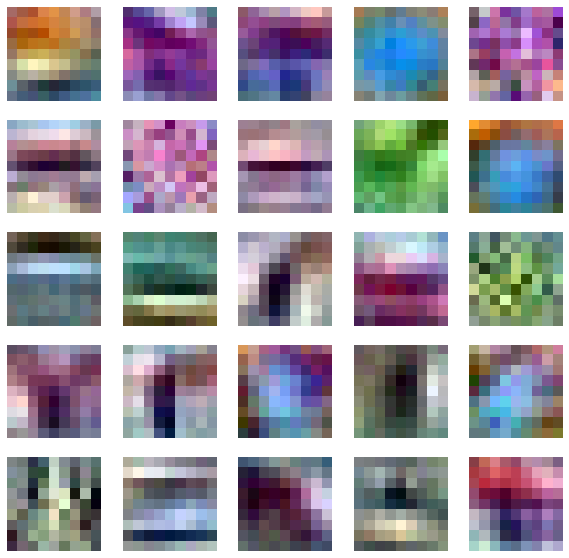

In [85]:
plot_weights(adam_big_ker_accel.layers[0].wts.transpose(0, 2, 3, 1), saveFig=False, filename='convWts_adam_train_20epoch.png')

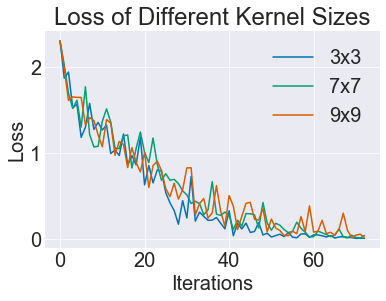

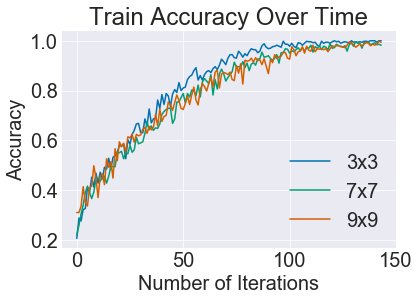

In [188]:
loss_3 = [a for i, a in enumerate(adam_small_ker_accel.loss_history) if i%50==0]
loss_7 = [a for i, a in enumerate(adam_net_accel.loss_history) if i%50==0]
loss_9 = [a for i, a in enumerate(adam_big_ker_accel.loss_history) if i%50==0]
plt.plot(loss_3, label='3x3')
plt.plot(loss_7, label='7x7')
plt.plot(loss_9, label='9x9')

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss of Different Kernel Sizes")
plt.legend()

plt.show()


plt.plot(adam_small_ker_accel.train_acc_history, label='3x3')
plt.plot(adam_net_accel.train_acc_history, label='7x7')
plt.plot(adam_big_ker_accel.train_acc_history, label='9x9')

plt.xlabel("Number of Iterations")
plt.ylabel("Accuracy")
plt.title("Train Accuracy Over Time")
plt.legend()

plt.show()

### 5. Dream Images(???)

For this extension we implemented something similar the dream like backprop into the image, emphasizing parts of the image that would result in it being classified as a particular class. To do this, I implemented a forward pass, followed by a complete backward pass, taking the upstream gradients for the image. This gradient can be considered to be the impact of each pixel on the final output of the image. Thus, by choosing a y one hot vector of our choice from our STL-10 data set, we can try to make our images look more like they belong to that class. Unfortunately, the data our model is trained on is very pixilated and it is tough for us to see good clear results. However, there are some recognizable ones such as when we try to make an aeroplane, most diagonal lines are emphasized (partially seen in images 2 & 9) and the presence of windows can be seen to start moving toward the shape of a cockpit (this can clearly be seen in image 6 below) while the rest of the image starts to get blurry.

One difference in this implementation than the one we considered in class was that we did gradient descent as opposed to gradient ascent.

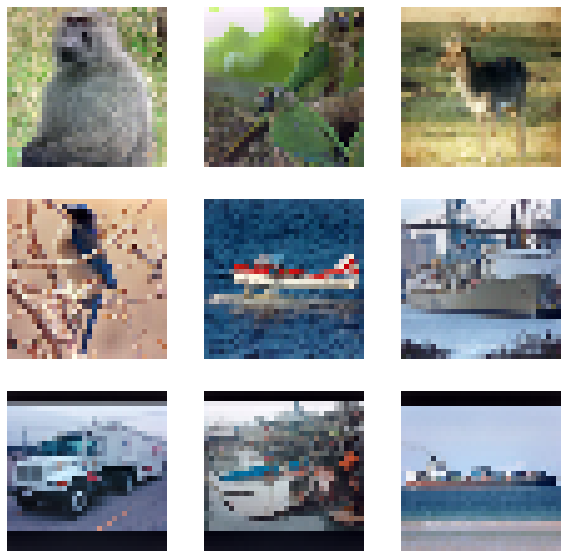

[7 1 4 1 0 8 9 8 8]
0


In [175]:
plot_weights(x_test[0:9].transpose(0, 2, 3, 1))
print(y_test[0:9])
test_img1 = x_test[0:1]
test_img2 = x_test[1:2]
test_img3 = x_test[2:3]
test_img4 = x_test[3:4]
test_img5 = x_test[4:5]
test_img6 = x_test[5:6]
test_img7 = x_test[6:7]
test_img8 = x_test[7:8]
test_img9 = x_test[8:9]
results=[]
y = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
print(np.argmax(y))
results.append(adam_small_ker_accel.dream_img(test_img1, y=y, intensity_iterations=75))
results.append(adam_small_ker_accel.dream_img(test_img2, y=y, intensity_iterations=75))
results.append(adam_small_ker_accel.dream_img(test_img3, y=y, intensity_iterations=75))
results.append(adam_small_ker_accel.dream_img(test_img4, y=y, intensity_iterations=75))
results.append(adam_small_ker_accel.dream_img(test_img5, y=y, intensity_iterations=75))
results.append(adam_small_ker_accel.dream_img(test_img6, y=y, intensity_iterations=75))
results.append(adam_small_ker_accel.dream_img(test_img7, y=y, intensity_iterations=75))
results.append(adam_small_ker_accel.dream_img(test_img8, y=y, intensity_iterations=75))
results.append(adam_small_ker_accel.dream_img(test_img9, y=y, intensity_iterations=75))
results = np.stack(results, axis=0)

(9, 3, 32, 32)


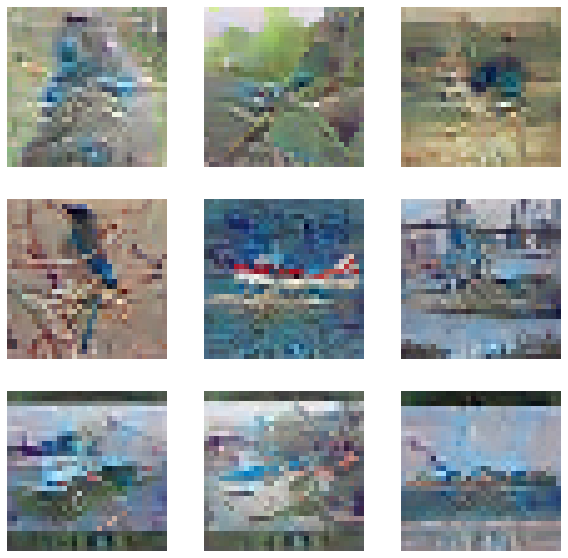

In [176]:
results = np.squeeze(results)
print(results.shape)
plot_weights(results.transpose(0, 2, 3, 1))